In [1]:
#Importar librerias
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
sns.set()
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#Importartar data set
data=pd.read_csv('vistara.csv')

In [3]:
#Eliminar una columna de la data que traia Unnamed
data=data.drop(['Unnamed: 11'], axis=1)


In [4]:
#Crear columan dolares
data['dolares'] = data['price'] * 0.12

In [5]:
#Encabezado data con nueva columna 
data.head(3)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,dolares
0,Vistara,UK-893,Bangalore,Evening,zero,Night,Hyderabad,Economy,1.00,16,1714,205.68
1,Vistara,UK-893,Bangalore,Evening,zero,Night,Hyderabad,Economy,1.00,17,1714,205.68
2,Vistara,UK-897,Bangalore,Early_Morning,zero,Morning,Hyderabad,Economy,1.17,17,1714,205.68


In [6]:
#Información
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127859 entries, 0 to 127858
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           127859 non-null  object 
 1   flight            127859 non-null  object 
 2   source_city       127859 non-null  object 
 3   departure_time    127859 non-null  object 
 4   stops             127859 non-null  object 
 5   arrival_time      127859 non-null  object 
 6   destination_city  127859 non-null  object 
 7   class             127859 non-null  object 
 8   duration          127859 non-null  float64
 9   days_left         127859 non-null  int64  
 10  price             127859 non-null  int64  
 11  dolares           127859 non-null  float64
dtypes: float64(2), int64(2), object(8)
memory usage: 11.7+ MB


In [7]:
# columnas y filas
data.shape


(127859, 12)

In [8]:
#Variables dataset
data.describe()


,duration,days_left,price,dolares
count,127859.000000,127859.000000,127859.000000,127859.000000
mean,13.326634,25.894532,30396.536302,3647.584356
std,6.777230,13.638537,25637.159445,3076.459133
min,1.000000,1.000000,1714.000000,205.680000
25%,8.500000,14.000000,6412.000000,769.440000
50%,12.500000,26.000000,15543.000000,1865.160000
75%,17.000000,38.000000,55377.000000,6645.240000
max,47.080000,49.000000,123071.000000,14768.520000


In [9]:
#Buscar null
data.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dolares             0
dtype: int64

In [10]:
#Valor unico de cada variable
data.nunique()


airline                1
flight               133
source_city            6
departure_time         5
stops                  3
arrival_time           6
destination_city       6
class                  2
duration             392
days_left             49
price               5303
dolares             5303
dtype: int64

# Distribuciones Data

## Frecuencia ciudad de salida

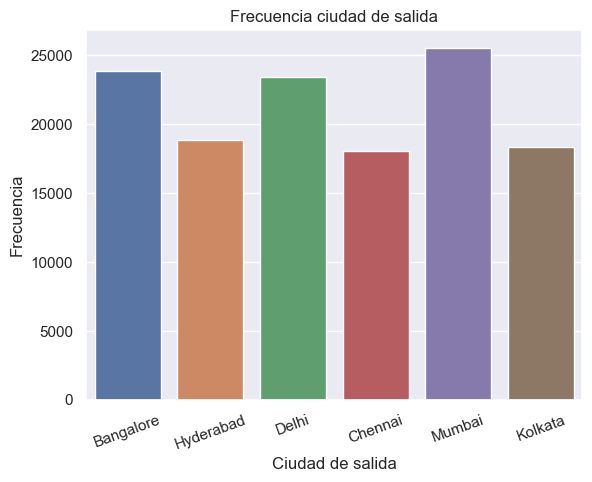

In [11]:
sns.countplot(data=data, x='source_city')
plt.xlabel('Ciudad de salida')
plt.ylabel('Frecuencia')
plt.title('Frecuencia ciudad de salida')
plt.xticks(rotation=20)
plt.show()

En la grafica anterior se puede envidenciar que la cuidad de salida más común es Mumbai. Por otro las las cuidades que tienen salida más comun es Bangalore y Delhi. Finalmente las otras cuidades (Hyderabad,chennai,kolkata) tiene una distribución más uniforme.

## Distribución de precios por ciudad de salida

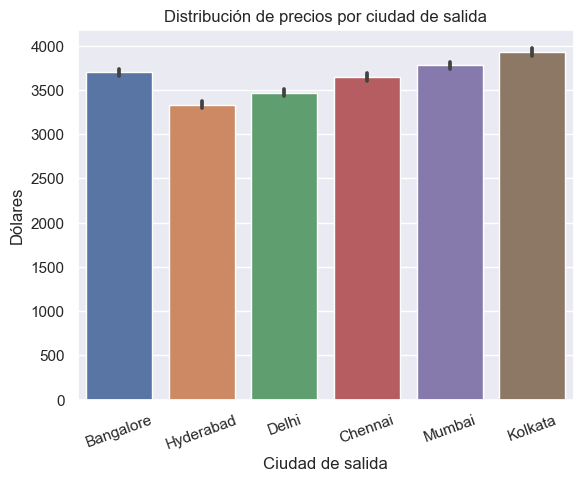

In [12]:
sns.barplot(data=data, x='source_city', y='dolares')
plt.xlabel('Ciudad de salida')
plt.ylabel('Dólares')
plt.title('Distribución de precios por ciudad de salida')
plt.xticks(rotation=20)
plt.show()



Se evidencia como los precios varian en función de las cuidades de salida. La ciudad kolkata tiende a tener los precios de salida más altos, así como Hyderabad tienen los rangos precio más bajos.

## Frecuencia tiempo de partida

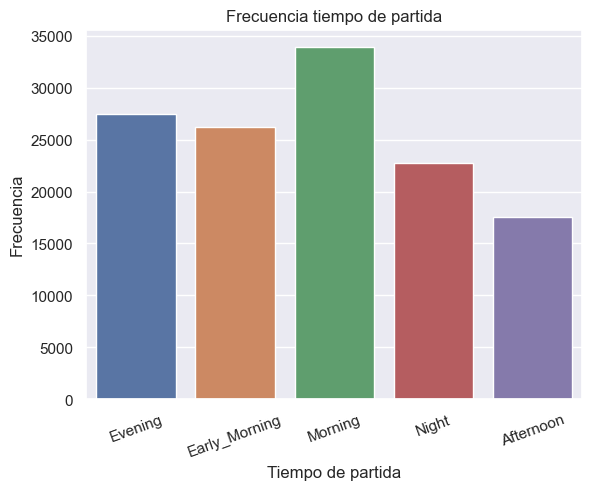

In [13]:
sns.countplot(data=data, x='departure_time')
plt.xlabel('Tiempo de partida')
plt.ylabel('Frecuencia')
plt.title('Frecuencia tiempo de partida')
plt.xticks(rotation=20)
plt.show()

La grafica muestra el tiempo de partida en función de la frecuencia. La mayoría de los vuelos parten en la mañana, con una frecuencia entre 30000 y 350000. Los vuelos de la tarde son los que menos se frecuentan. Por lo tanto, suponemos que los viajeros prefieren viajar en las horas de la mañana.

## Distribución de precios por tiempo de partida

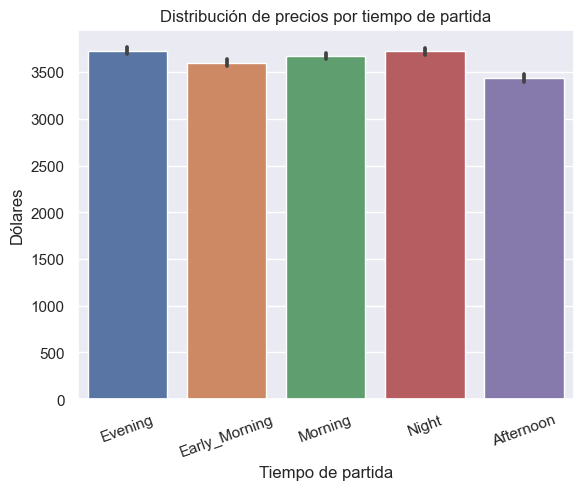

In [14]:
sns.barplot(data=data, x='departure_time', y='dolares')
plt.xlabel('Tiempo de partida')
plt.ylabel('Dólares')
plt.title('Distribución de precios por tiempo de partida')
plt.xticks(rotation=20)
plt.show()

En esta grafica podemos observar el comportamiento del precio del tiquete con respecto a la hora en la que parte el vueelo, el costo mas alto con muy poca diferencia es en la noche sin embargo no hay una variación de precio muy alta con respecto a el tiempo en el que sale el vuelo.

## Frecuencia de escalas

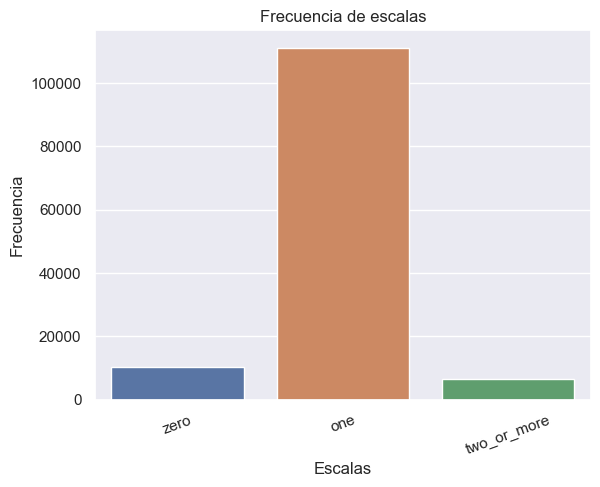

In [15]:
sns.countplot(data=data, x='stops')
plt.xlabel('Escalas')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de escalas')
plt.xticks(rotation=20)
plt.show()

La grafica muestra la cantidad de vuelos por la cantidad de escalas siendo cero escalas (vuelos directos), una escala (una parada), dos o más escalas (dos o más paradas). La mayoría de las personas prefieren vuelos con una sola escala.

## Distribución de precios por escala

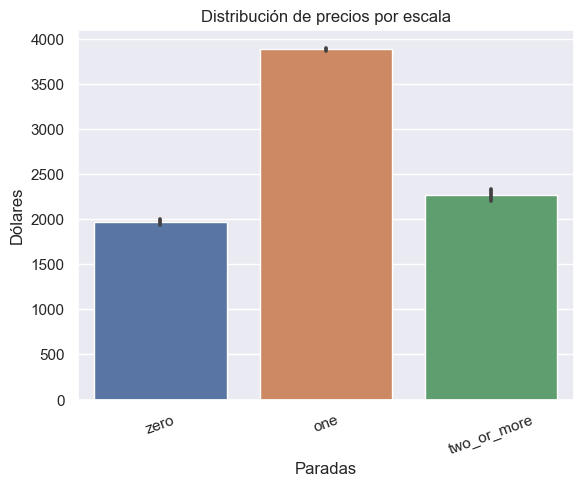

In [16]:
sns.barplot(data=data, x='stops', y='dolares')
plt.xlabel('Paradas')
plt.ylabel('Dólares')
plt.title('Distribución de precios por escala')
plt.xticks(rotation=20)
plt.show()

La grafica muestra como varia el precio en función de las paradas. Los vuelos con una parada tienden a tener precios más altos en relacion con las demás paradas. La preferencia de los viajeros por los vuelos de una sola parada sugiere que estan dispuestos a pagar un poco más por esta opción.

## Frecuencia ciudad de destino

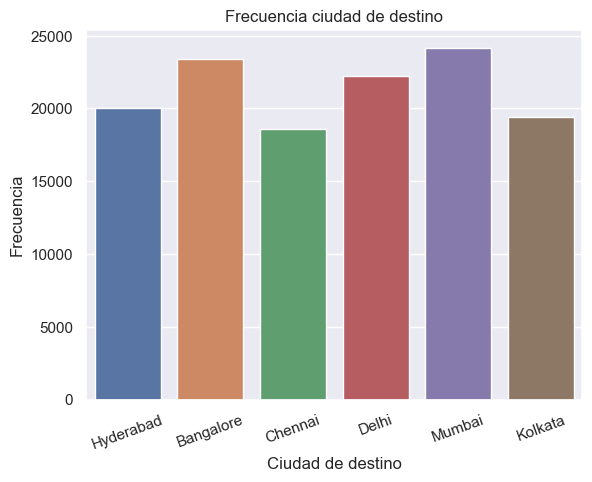

In [17]:
sns.countplot(data=data, x='destination_city')
plt.xlabel('Ciudad de destino')
plt.ylabel('Frecuencia')
plt.title('Frecuencia ciudad de destino')
plt.xticks(rotation=20)
plt.show()

En esta grafica se evidencia la cantidad de vuelos que viajan hacia los diferentes destinos, la ciudad que mas vuelos recibe es Mumbai y la ciudad que menos vuelos recibe es Chennai.

## Distribución de precios por ciudad de destino

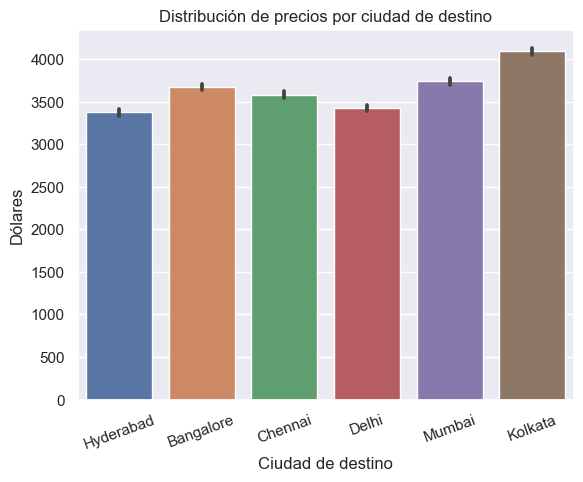

In [18]:
sns.barplot(data=data, x='destination_city', y='dolares')
plt.xlabel('Ciudad de destino')
plt.ylabel('Dólares')
plt.title('Distribución de precios por ciudad de destino')
plt.xticks(rotation=20)
plt.show()

Esta grafica muestra el precio promedio dependiendo de cual es el destino, se evidencia que la ciudad más cara para viajar es Kolkata con un precio promedio por encima de los 400 dolares, mientras que los cuidadanos con un numero menor de precio promedio es Hyderabad dentro de un rango de 3000 - $3500.

## Frecuencia de clase

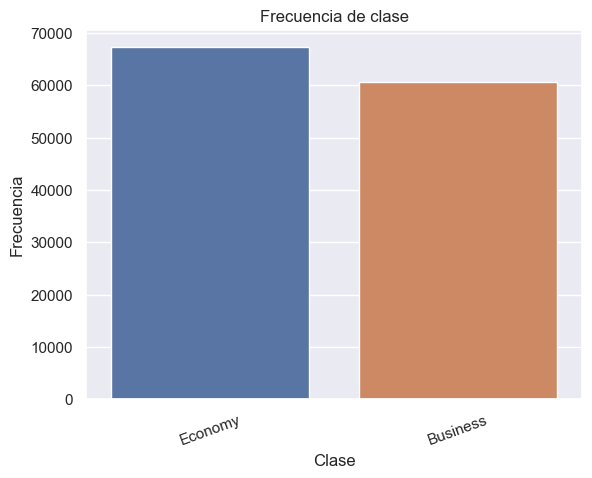

In [19]:
sns.countplot(data=data, x='class')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de clase')
plt.xticks(rotation=20)
plt.show()

podemos ver en la anterior grafica que no existe la diferencia que se esperaria entre la cantidad de vuelos por clase econmica y vuelos por clase "Business", aun asi sigue siendo mayor la cantidad de gente que viaja en clase economica con una diferencia aproximada de 50000 personas.

## Distribución de precios por clase

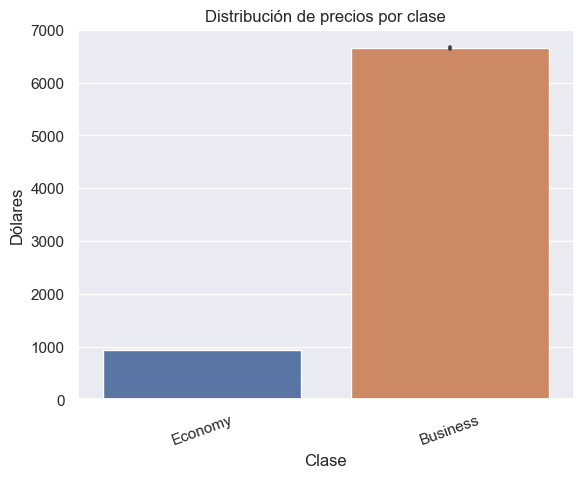

In [20]:
sns.barplot(data=data, x='class', y='dolares')
plt.xlabel('Clase')
plt.ylabel('Dólares')
plt.title('Distribución de precios por clase')
plt.xticks(rotation=20)
plt.show()

por el mismo hecho de que la diferencia entre la cantidad de vuelos entre clase economica y "Business" es tan baja es decir son muy cercanos el precio de la clase "Business" es mucho mayor siendo aproximadamente de 6500 mientras que el precio promedio de la clase economica se encuentra debajo de los 1000 doalres

## Distribución de duración'

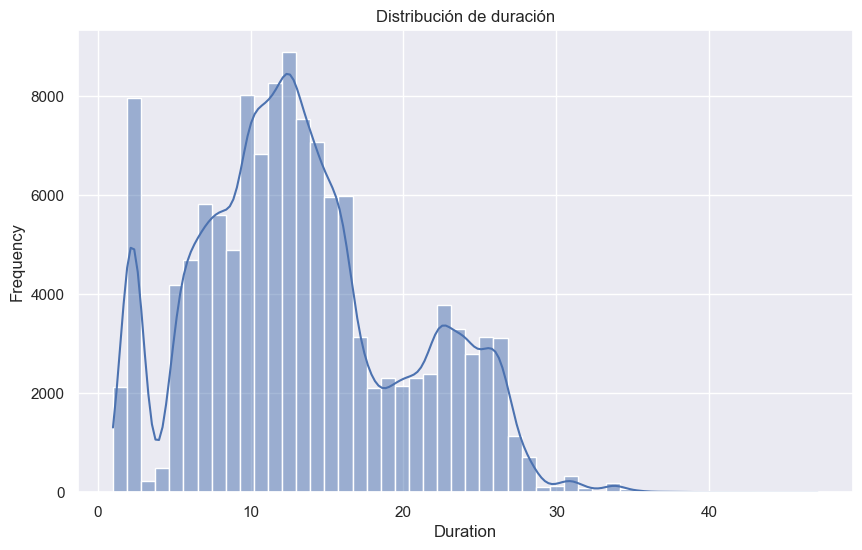

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='duration', bins=50, kde=True)  # Ajusta el número de bins según tus necesidades
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.title('Distribución de duración')
plt.show()

Se puede evidenciar que la mayor cantidad de vuelos se encuentra en promedio entre 10 a 16 horas aproximadamente.

## Frecuencia ciudad de destino

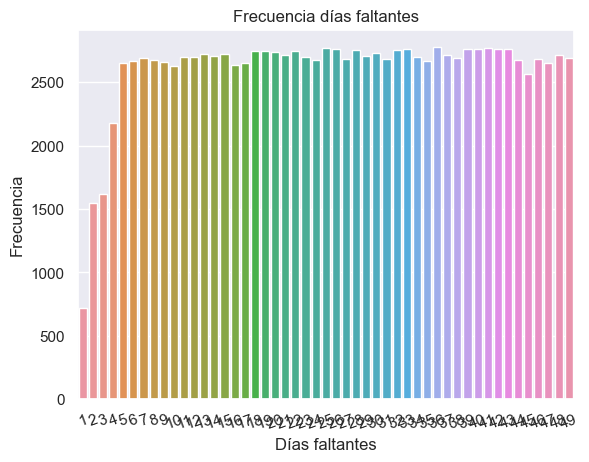

In [22]:
sns.countplot(data=data, x='days_left')
plt.xlabel("Días faltantes")
plt.ylabel('Frecuencia')
plt.title('Frecuencia días faltantes')
plt.xticks(rotation=20)
plt.show()

La grafica muestra la frecuencia en función de los días faltantes al vuelo. Se puede observar una distribución uniforme en la compra de boletos, lo que indica que es más común adquirirlos con cierta anticipación antes del cuarto día del vuelo. En otras palabras, las personas suelen comprar los vuelos con un margen de tiempo previo, ya sea 4, 5, 6 días antes, e incluso hasta 49 días antes de la fecha de partida.El primer día es el que menos compra de vuelos hay.

## Días de salida vs Dolares

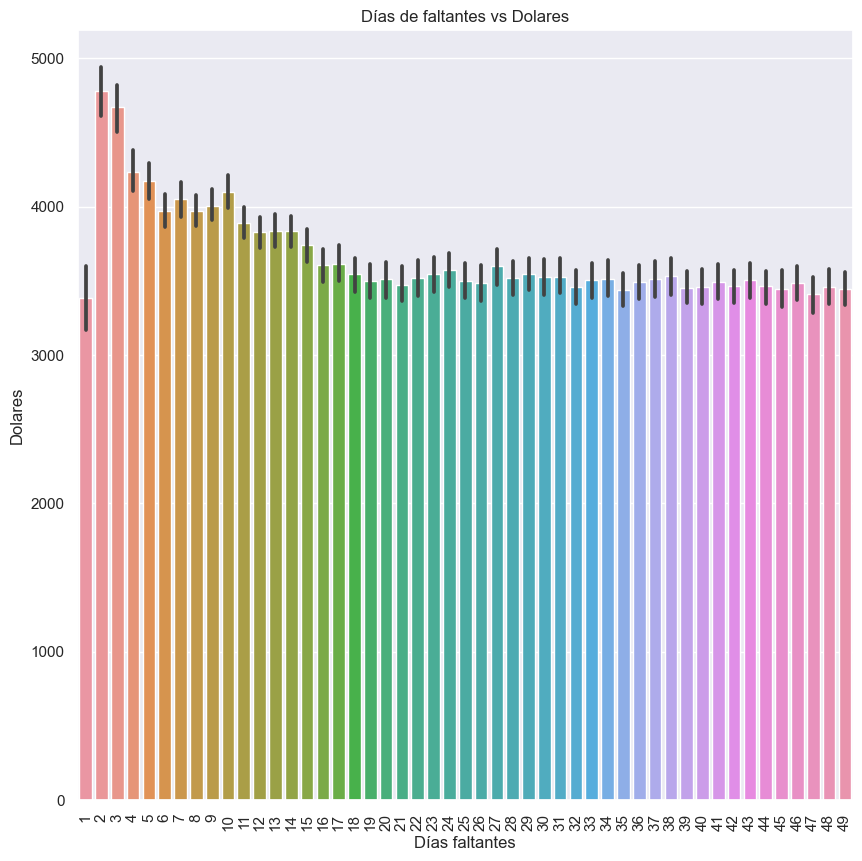

In [23]:
df=sns.set(font_scale=1)
df=plt.figure(figsize=(10, 10)) 
df=sns.barplot(data=data, x='days_left', y='dolares')
df=plt.xlabel('Días faltantes')
df=plt.ylabel('Dolares')
df=plt.title('Días de faltantes vs Dolares')
df=plt.xticks(rotation=90)
df=plt.show()

La grafica muestra el precio de los vuelos en función de los días faltantes al vuelo. Un día antes del vuelo se puede ver que es el menor precio a riesgo de no tener las comodidades esperadas, por otro lado, adquirir dos o tres días antes el tiquete es más caro. Adquirirlo con cierta anticipación antes del día cuarto tiene un menor precio, entre más alejado este el día de vuelo más economico será el tiquete.

# Limpieza de datos

Para la limpieza de datos, haremos diagramas de cajas para todas las variables.

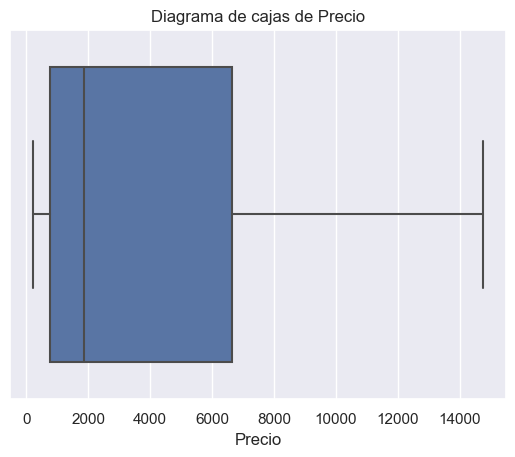

In [24]:
#precio
sns.boxplot(x=data['dolares'])
plt.xlabel('Precio')
plt.title('Diagrama de cajas de Precio')
plt.show()

El precio medio se mantiene por debajo de los $2000 y no cuenta con valores atipicos

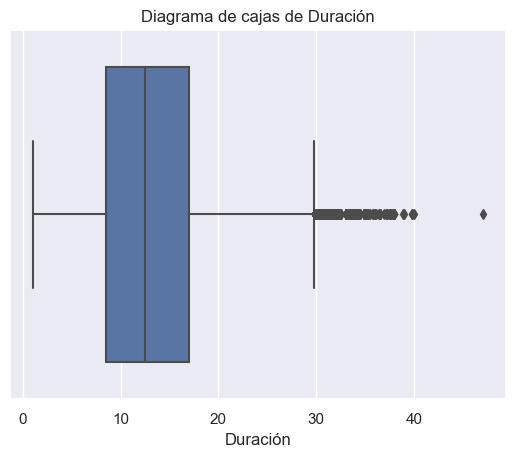

In [25]:
#Duración
sns.boxplot(x=data['duration'])
plt.xlabel('Duración')
plt.title('Diagrama de cajas de Duración')
plt.show()

Vemos que la mediana es de aproximadamente 12 horas y podemos ver que si tiene bastantes datos atípicos

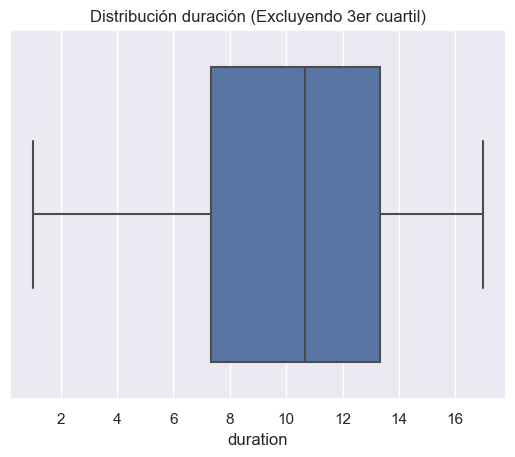

In [26]:
#Calcular el 3er cuartil
tercer_cuartil = data['duration'].quantile(0.75)

# Filtrar los valores que son menores o iguales al tercer cuartil
data_filtrada = data[data['duration'] <= tercer_cuartil]

# Generar el boxplot con los valores filtrados
sns.boxplot(x=data_filtrada['duration'])
plt.xlabel('duration')
plt.title('Distribución duración (Excluyendo 3er cuartil)')
plt.show()

Despues de eliminar el cuartil 3 se evidencia que se borran los datos atípicos y la guardamos en una nueva data que es la data_filtrada

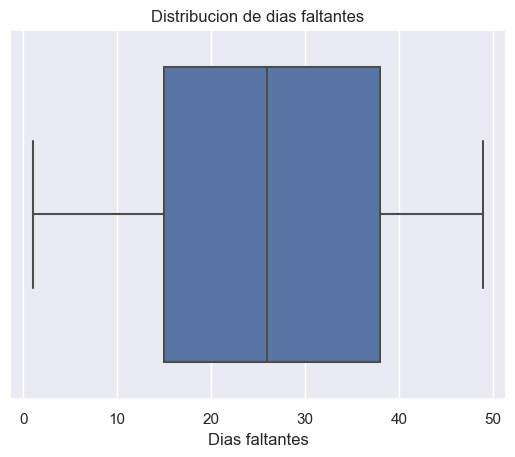

In [27]:
#Dias faltantes
sns.boxplot(x=data_filtrada['days_left'])
plt.xlabel('Dias faltantes')
plt.title('Distribucion de dias faltantes')
plt.show()

La grafica muestra que la mediana esta entre 20 y 30, lo que indica que la mitad de lo días faltantes a un vuelo esta por debajo de 30 días aproximadamente y la otra mitad por encima. No hay evidencia de datos atipicos.

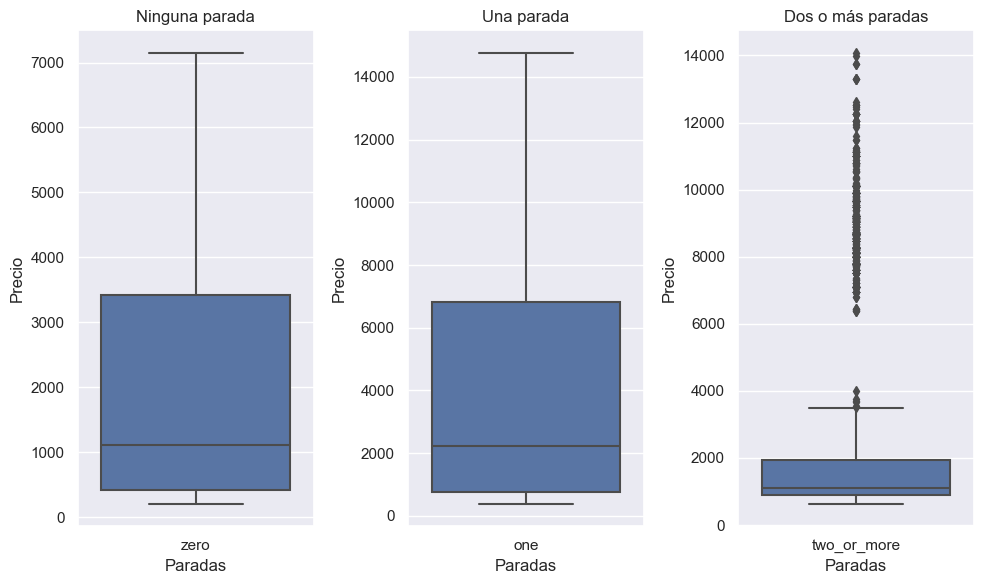

In [28]:
plt.figure(figsize=(10, 6))  # Cambia el tamaño de la figura si es necesario

# Boxplot para 'zero'
plt.subplot(1, 3, 1)
sns.boxplot(x='stops', y='dolares', data=data[data['stops'] == 'zero'])
plt.title('Ninguna parada')
plt.xlabel('Paradas')
plt.ylabel('Precio')

# Boxplot para 'one'
plt.subplot(1, 3, 2)
sns.boxplot(x='stops', y='dolares', data=data[data['stops'] == 'one'])
plt.title('Una parada')
plt.xlabel('Paradas')
plt.ylabel('Precio')

# Boxplot para 'two_or_more'
plt.subplot(1, 3, 3)
sns.boxplot(x='stops', y='dolares', data=data[data['stops'] == 'two_or_more'])
plt.title('Dos o más paradas')
plt.xlabel('Paradas')
plt.ylabel('Precio')

# Ajusta el diseño para evitar superposición de títulos y etiquetas
plt.tight_layout()
plt.show()

Se realizo el diagrama de caja de las variables que conforma stops y se puede evidenciar que la variable "two_or_more" muestra una gran cantidad de datos atipicos

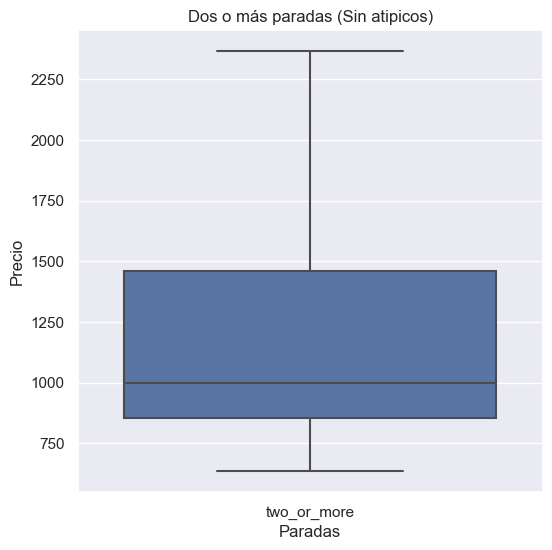

In [29]:

data_filtered = data[data['stops'] == 'two_or_more']

# Calcula el rango intercuartílico (IQR) para la variable 'price'
Q1 = data_filtered['dolares'].quantile(0.25)
Q3 = data_filtered['dolares'].quantile(0.75)
IQR = Q3 - Q1

# Define los límites para identificar los valores atípicos
lower_bound = Q1 - 0.4 * IQR
upper_bound = Q3 + 0.4 * IQR

# Filtra los valores que no son atípicos
data_filtrada = data_filtered[(data_filtered['dolares'] >= lower_bound) & (data_filtered['dolares'] <= upper_bound)]

# Crea el boxplot para 'two_or_more' sin valores atípicos
plt.figure(figsize=(6, 6))
sns.boxplot(x='stops', y='dolares', data=data_filtrada)
plt.title('Dos o más paradas (Sin atipicos)')
plt.xlabel('Paradas')
plt.ylabel('Precio')
plt.show()

Despues de haber usado los IQR para poder eliminar los datos atípicos


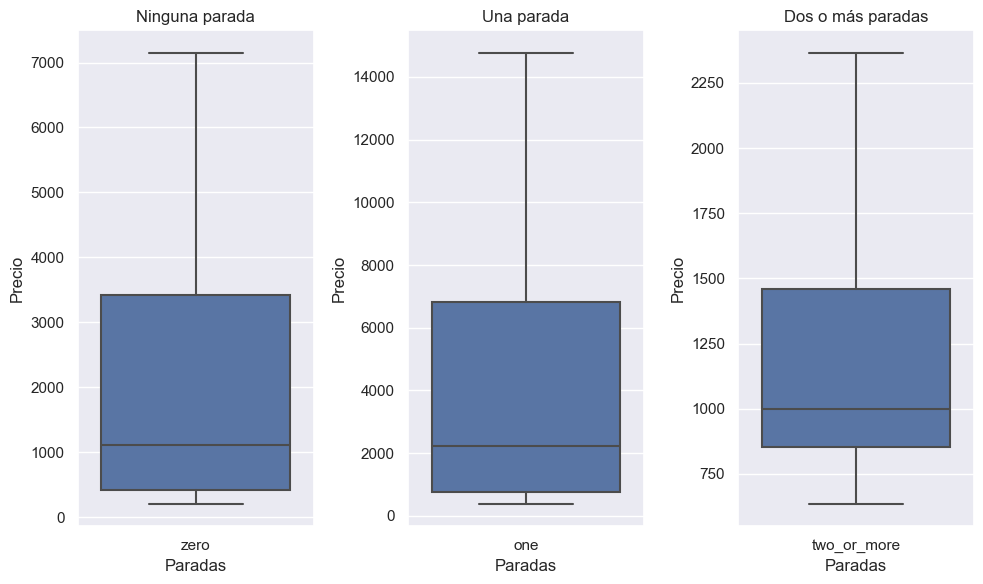

In [30]:
plt.figure(figsize=(10, 6))  # Cambia el tamaño de la figura si es necesario

plt.subplot(1, 3, 1)
sns.boxplot(x='stops', y='dolares', data=data[data['stops'] == 'zero'])
plt.title('Ninguna parada')
plt.xlabel('Paradas')
plt.ylabel('Precio')

# Boxplot para 'one'
plt.subplot(1, 3, 2)
sns.boxplot(x='stops', y='dolares', data=data[data['stops'] == 'one'])
plt.title('Una parada')
plt.xlabel('Paradas')
plt.ylabel('Precio')

# Boxplot para 'two_or_more'
plt.subplot(1, 3, 3)
sns.boxplot(x='stops', y='dolares', data=data_filtrada[data_filtrada['stops'] == 'two_or_more'])
plt.title('Dos o más paradas')
plt.xlabel('Paradas')
plt.ylabel('Precio')

# Ajusta el diseño para evitar superposición de títulos y etiquetas
plt.tight_layout()
plt.show()

Asi quedaron los diagramas de caja despues de haber eliminado los datos atípicos

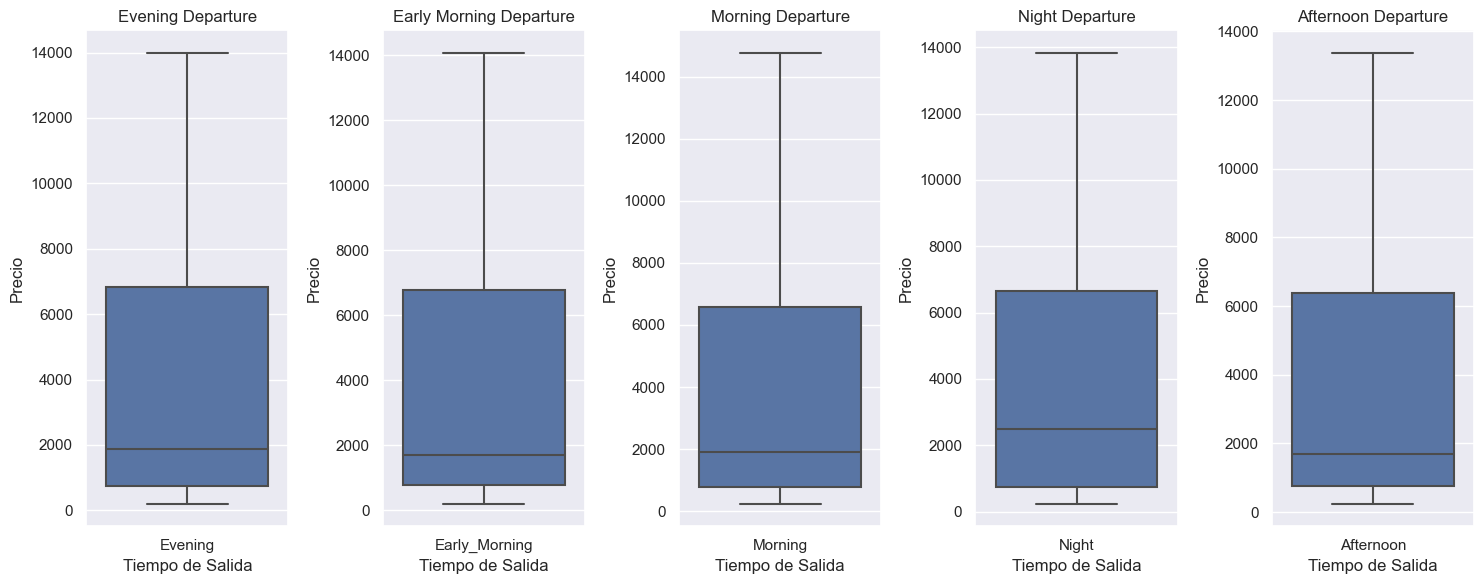

In [31]:
plt.figure(figsize=(15, 6))  # Cambia el tamaño de la figura si es necesario

# Boxplot para 'Evening'
plt.subplot(1, 5, 1)
sns.boxplot(x='departure_time', y='dolares', data=data[data['departure_time'] == 'Evening'])
plt.title('Evening Departure')
plt.xlabel('Tiempo de Salida')
plt.ylabel('Precio')

# Boxplot para 'Early_morning'
plt.subplot(1, 5, 2)
sns.boxplot(x='departure_time', y='dolares', data=data[data['departure_time'] == 'Early_Morning'])
plt.title('Early Morning Departure')
plt.xlabel('Tiempo de Salida')
plt.ylabel('Precio')

# Boxplot para 'Morning'
plt.subplot(1, 5, 3)
sns.boxplot(x='departure_time', y='dolares', data=data[data['departure_time'] == 'Morning'])
plt.title('Morning Departure')
plt.xlabel('Tiempo de Salida')
plt.ylabel('Precio')

# Boxplot para 'Night'
plt.subplot(1, 5, 4)
sns.boxplot(x='departure_time', y='dolares', data=data[data['departure_time'] == 'Night'])
plt.title('Night Departure')
plt.xlabel('Tiempo de Salida')
plt.ylabel('Precio')

# Boxplot para 'Afternoon'
plt.subplot(1, 5, 5)
sns.boxplot(x='departure_time', y='dolares', data=data[data['departure_time'] == 'Afternoon'])
plt.title('Afternoon Departure')
plt.xlabel('Tiempo de Salida')
plt.ylabel('Precio')

# Ajusta el diseño para evitar superposición de títulos y etiquetas
plt.tight_layout()
plt.show()

Se realizó el diagrama de cajas de las variabels que hacen parte de la variable Tiempo de salida comparado con el precio. La mediana de las variables esta al rededor de 2000 pesos y no se evidencian datos atipicos.

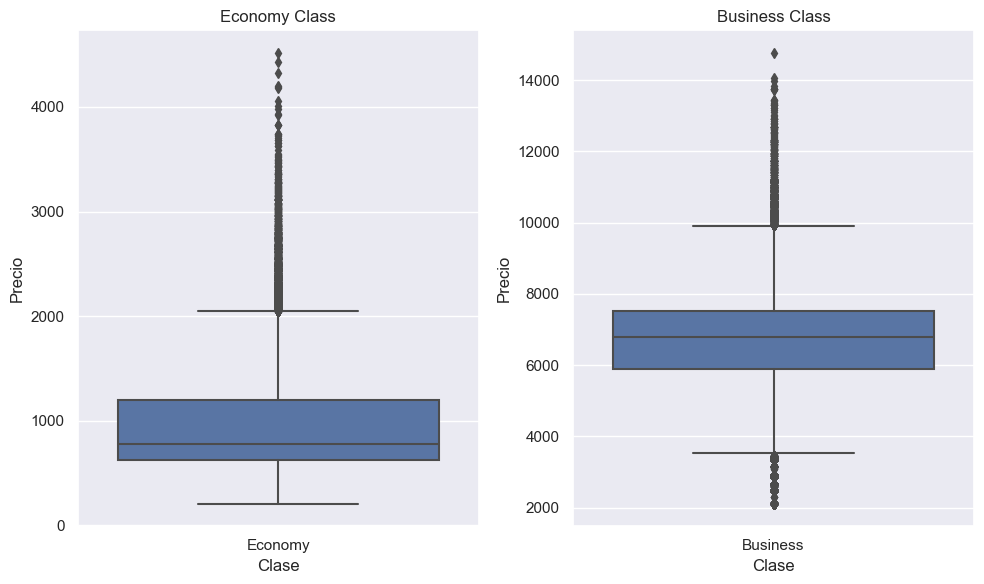

In [32]:
plt.figure(figsize=(10, 6))  # Cambia el tamaño de la figura si es necesario

# Boxplot para 'Economy'
plt.subplot(1, 2, 1)
sns.boxplot(x='class', y='dolares', data=data[data['class'] == 'Economy'])
plt.title('Economy Class')
plt.xlabel('Clase')
plt.ylabel('Precio')

# Boxplot para 'Business'
plt.subplot(1, 2, 2)
sns.boxplot(x='class', y='dolares', data=data[data['class'] == 'Business'])
plt.title('Business Class')
plt.xlabel('Clase')
plt.ylabel('Precio')

# Ajusta el diseño para evitar superposición de títulos y etiquetas
plt.tight_layout()
plt.show()

Se hace el analisis de diagrama de cajas para class que cuenta con las variables "Economy" y "Business", se evidencia que para este caso existen muchos datos atipicos y que como se habia comentado

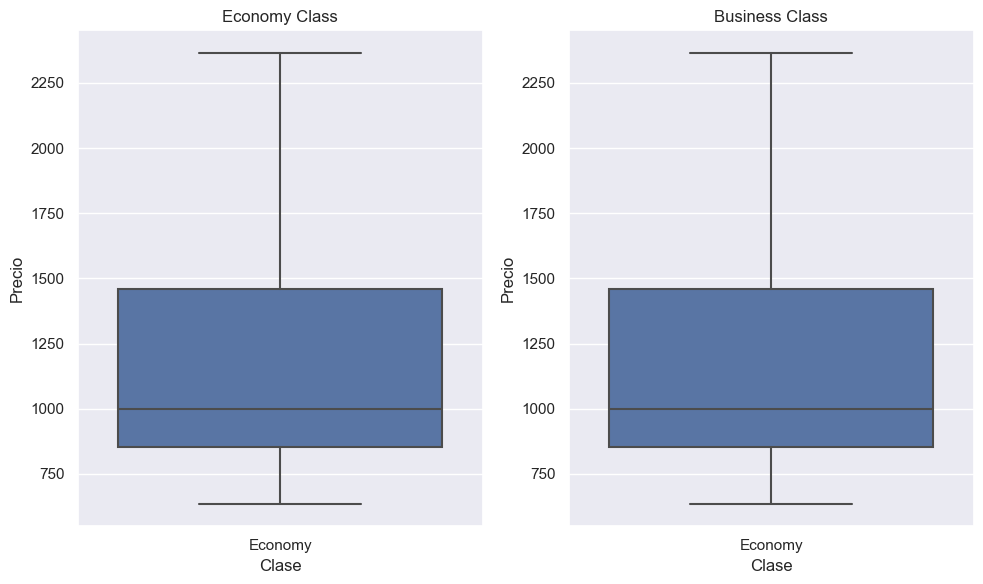

In [33]:
# Función para eliminar valores atípicos según el método del rango intercuartílico (IQR)
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.0 * IQR
    upper_bound = Q3 + 1.0 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Filtrar los datos por cada categoría y crea los boxplots separados
plt.figure(figsize=(10, 6))  # Cambia el tamaño de la figura si es necesario

data_economy = remove_outliers(data[data['class'] == 'Economy'], 'dolares')
plt.subplot(1, 2, 1)
sns.boxplot(x='class', y='dolares', data=data_filtrada)
plt.title('Economy Class')
plt.xlabel('Clase')
plt.ylabel('Precio')

# Filtrar los datos eliminando valores atípicos para 'Business'
data_business = remove_outliers(data[data['class'] == 'Business'], 'dolares')
plt.subplot(1, 2, 2)
sns.boxplot(x='class', y='dolares', data=data_filtrada)
plt.title('Business Class')
plt.xlabel('Clase')
plt.ylabel('Precio')

# Ajustar el diseño para evitar superposición de títulos y etiquetas
plt.tight_layout()
plt.show()

Asi quedaron los diagramas de caja despues de haber eliminado los datos atípicos

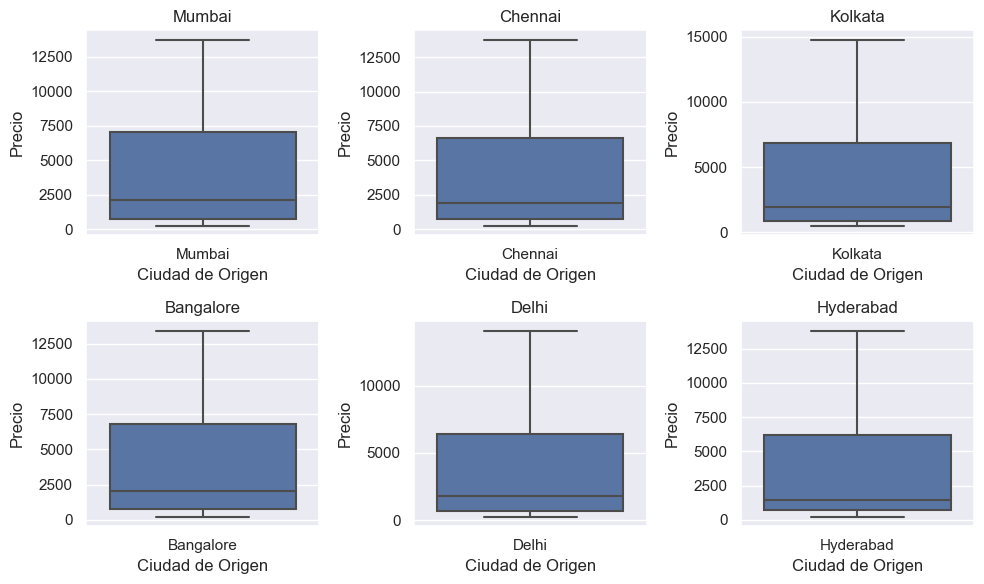

In [34]:
plt.figure(figsize=(10, 6))  # Cambia el tamaño de la figura si es necesario

# Boxplot para 'Mumbai'
plt.subplot(2, 3, 1)
sns.boxplot(x='source_city', y='dolares', data=data[data['source_city'] == 'Mumbai'])
plt.title('Mumbai')
plt.xlabel('Ciudad de Origen')
plt.ylabel('Precio')

# Boxplot para 'Chennai'
plt.subplot(2, 3, 2)
sns.boxplot(x='source_city', y='dolares', data=data[data['source_city'] == 'Chennai'])
plt.title('Chennai')
plt.xlabel('Ciudad de Origen')
plt.ylabel('Precio')

# Boxplot para 'Kolkata'
plt.subplot(2, 3, 3)
sns.boxplot(x='source_city', y='dolares', data=data[data['source_city'] == 'Kolkata'])
plt.title('Kolkata')
plt.xlabel('Ciudad de Origen')
plt.ylabel('Precio')

# Boxplot para 'Bangalore'
plt.subplot(2, 3, 4)
sns.boxplot(x='source_city', y='dolares', data=data[data['source_city'] == 'Bangalore'])
plt.title('Bangalore')
plt.xlabel('Ciudad de Origen')
plt.ylabel('Precio')

# Boxplot para 'Delhi'
plt.subplot(2, 3, 5)
sns.boxplot(x='source_city', y='dolares', data=data[data['source_city'] == 'Delhi'])
plt.title('Delhi')
plt.xlabel('Ciudad de Origen')
plt.ylabel('Precio')

# Boxplot para 'Hyderabad'
plt.subplot(2, 3, 6)
sns.boxplot(x='source_city', y='dolares', data=data[data['source_city'] == 'Hyderabad'])
plt.title('Hyderabad')
plt.xlabel('Ciudad de Origen')
plt.ylabel('Precio')

# Ajusta el diseño para evitar superposición de títulos y etiquetas
plt.tight_layout()
plt.show()

Se realizó el diagrama de cajas de las cuidades que hacen parte de la variable ciudad de origen comparado con el precio. No se evidencias datos atipicos.

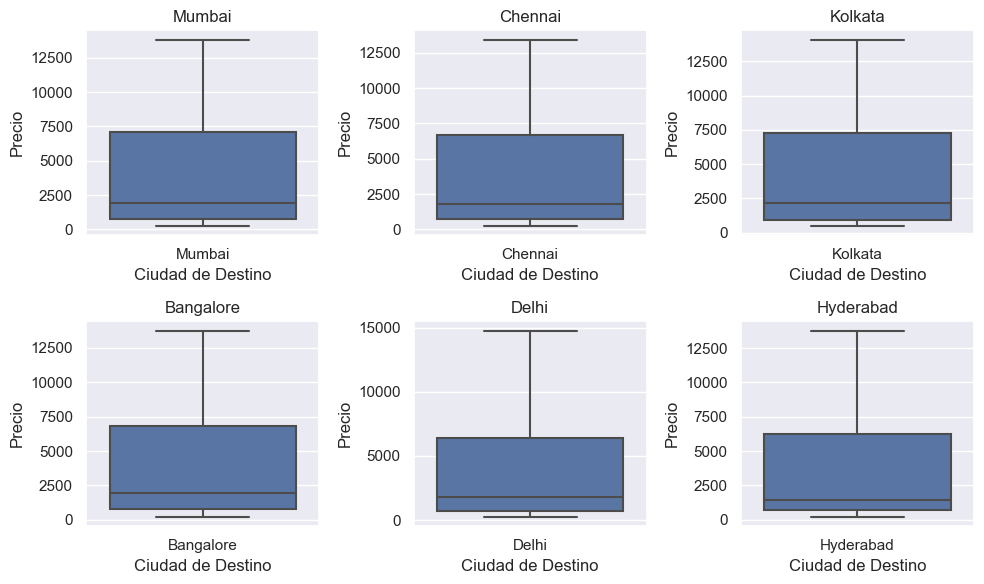

In [35]:
plt.figure(figsize=(10, 6))  # Cambia el tamaño de la figura si es necesario

# Boxplot para 'Mumbai'
plt.subplot(2, 3, 1)
sns.boxplot(x='destination_city', y='dolares', data=data[data['destination_city'] == 'Mumbai'])
plt.title('Mumbai')
plt.xlabel('Ciudad de Destino')
plt.ylabel('Precio')

# Boxplot para 'Chennai'
plt.subplot(2, 3, 2)
sns.boxplot(x='destination_city', y='dolares', data=data[data['destination_city'] == 'Chennai'])
plt.title('Chennai')
plt.xlabel('Ciudad de Destino')
plt.ylabel('Precio')

# Boxplot para 'Kolkata'
plt.subplot(2, 3, 3)
sns.boxplot(x='destination_city', y='dolares', data=data[data['destination_city'] == 'Kolkata'])
plt.title('Kolkata')
plt.xlabel('Ciudad de Destino')
plt.ylabel('Precio')

# Boxplot para 'Bangalore'
plt.subplot(2, 3, 4)
sns.boxplot(x='destination_city', y='dolares', data=data[data['destination_city'] == 'Bangalore'])
plt.title('Bangalore')
plt.xlabel('Ciudad de Destino')
plt.ylabel('Precio')

# Boxplot para 'Delhi'
plt.subplot(2, 3, 5)
sns.boxplot(x='destination_city', y='dolares', data=data[data['destination_city'] == 'Delhi'])
plt.title('Delhi')
plt.xlabel('Ciudad de Destino')
plt.ylabel('Precio')

# Boxplot para 'Hyderabad'
plt.subplot(2, 3, 6)
sns.boxplot(x='destination_city', y='dolares', data=data[data['destination_city'] == 'Hyderabad'])
plt.title('Hyderabad')
plt.xlabel('Ciudad de Destino')
plt.ylabel('Precio')

# Ajusta el diseño para evitar superposición de títulos y etiquetas
plt.tight_layout()
plt.show()

Se realizó el diagrama de cajas de las cuidades que hacen parte de la variable ciudad de destino comparado con el precio. No se evidencias datos atipicos.

# Tratamiento de datos

Pasamos las variables categoricas a variables númericas 

In [36]:
df = pd.get_dummies(data_filtrada, columns=['stops',"class","departure_time","source_city","destination_city"], drop_first=False)

Quitamos las variables:
"Airline" por que solo vamos usar a una aerolinea que es vistara
"Flight" No se van analizar los vuelos
"Class_economy" por que toda la data filtrada que vamos a manejar es clase economica entonces no suma valor
"stops_tow_or_more"por que toda la data filtrada que vamos a manejar realiza dos paradas o más entonces no suma valor
"arrival_time" por que consideramos mas importante el tiempo de la cuidad de destino
"price"por que hicimos la conversion a dolares y e manejara dolares

In [37]:
# Lista de columnas a eliminar
columns_to_drop = ['airline', 'flight', 'class_Economy', 'stops_two_or_more',"arrival_time","price"]

# Crear una nueva tabla excluyendo las columnas especificadas
df = df.drop(columns=columns_to_drop)

Aplicada las dummies así queda la base de datos

In [38]:
df

,duration,days_left,dolares,departure_time_Afternoon,departure_time_Early_Morning,departure_time_Evening,departure_time_Morning,departure_time_Night,source_city_Bangalore,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,destination_city_Bangalore,destination_city_Chennai,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
17708,8.75,19,635.28,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0
17709,8.75,20,635.28,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0
17710,8.75,21,635.28,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0
17711,8.75,22,635.28,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0
17712,8.75,26,635.28,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66648,8.08,15,2356.32,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
66659,13.83,2,2360.40,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
66660,26.67,2,2360.40,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
66661,37.83,2,2360.40,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [39]:
# Convertir 'True' a 1 y 'False' a 0 en todas las columnas

df = df.astype(int)

Y asi quedo la base de datos

In [40]:
df

,duration,days_left,dolares,departure_time_Afternoon,departure_time_Early_Morning,departure_time_Evening,departure_time_Morning,departure_time_Night,source_city_Bangalore,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,destination_city_Bangalore,destination_city_Chennai,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
17708,8,19,635,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0
17709,8,20,635,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0
17710,8,21,635,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0
17711,8,22,635,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0
17712,8,26,635,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66648,8,15,2356,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
66659,13,2,2360,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
66660,26,2,2360,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
66661,37,2,2360,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0


# Regresión lineal metodo rapido

Se aplica la regresión lineal por metodo rapido a las variable numericas "days_left", se realiza una comparación entre los datos original y los datos limpios

## Datos originales

In [41]:
# Definir las variables independiente (X) y dependiente (y)
X = data['days_left']
y = data['dolares']

# Agregar una constante (intercepción) a la matriz X
X = sm.add_constant(X)

# Crear el modelo de regresión
model = sm.OLS(y, X)

# Ajustar el modelo a los datos
results = model.fit()

# Obtener los resultados
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                dolares   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     609.1
Date:                Mon, 04 Sep 2023   Prob (F-statistic):          3.68e-134
Time:                        01:23:24   Log-Likelihood:            -1.2080e+06
No. Observations:              127859   AIC:                         2.416e+06
Df Residuals:                  127857   BIC:                         2.416e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4049.7747     18.419    219.872      0.0

La variable dolares es explicada por days_left en tan solo 0.5%, es decir tiene un ajuste muy pobre

## Datos filtrados

In [42]:
# Definir las variables independiente (X) y dependiente (y)
X = df['days_left']
y = df['dolares']

# Agregar una constante (intercepción) a la matriz X
X = sm.add_constant(X)

# Crear el modelo de regresión
model = sm.OLS(y, X)

# Ajustar el modelo a los datos
results = model.fit()

# Obtener los resultados
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                dolares   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     3681.
Date:                Mon, 04 Sep 2023   Prob (F-statistic):               0.00
Time:                        01:23:24   Log-Likelihood:                -38326.
No. Observations:                5299   AIC:                         7.666e+04
Df Residuals:                    5297   BIC:                         7.667e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1803.0590     11.357    158.767      0.0

La variable dolares es explicada por days_left en 41%, es decir tiene un ajuste muchisimo mejor comparado con los datos originales, por lo tanto usaremos los datos filtrados.

# Analisis de hipotesis

In [43]:
#Regresión lineal Multiple

X = df[['days_left', 'duration',"source_city_Chennai","source_city_Delhi","source_city_Hyderabad","source_city_Kolkata","source_city_Mumbai","source_city_Bangalore","destination_city_Bangalore","destination_city_Chennai","destination_city_Hyderabad","destination_city_Kolkata","destination_city_Mumbai","departure_time_Afternoon","departure_time_Morning","departure_time_Early_Morning","departure_time_Evening","departure_time_Night"]]  # Variables independientes
y = df['dolares']  # .Variable dependiente

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y ajustar el modelo de regresión lineal múltiple
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones utilizando el conjunto de prueba
y_pred = model.predict(X_test)

# Evalúar el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE:", mse)
print("R-squared:", r2)

MSE: 83098.65538979639
R-squared: 0.5492873033093446


Se quitan las variables que no estan aportando información al modelo, por lo tanto eliminar las variables: source_city_Bangalore, destination_city_Bangalore y departure_time_afternoon no afecta significativamente el modelo

In [44]:
#Regresión lineal Multiple

X = df[['days_left',"duration","source_city_Chennai","source_city_Delhi","source_city_Hyderabad","source_city_Kolkata","source_city_Mumbai","destination_city_Chennai","destination_city_Hyderabad","destination_city_Kolkata","destination_city_Mumbai","departure_time_Morning","departure_time_Early_Morning","departure_time_Evening","departure_time_Night"]]  # Variables independientes
y = df['dolares']  # .Variable dependiente

# Divide tus datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crea y ajusta el modelo de regresión lineal múltiple
model = LinearRegression()
model.fit(X_train, y_train)

# Realiza predicciones utilizando el conjunto de prueba
y_pred = model.predict(X_test)

# Evalúa el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE:", mse)
print("R-squared:", r2)

MSE: 83098.65538979637
R-squared: 0.5492873033093447


Tomamos variables de "Tiempo de salida" para hacer una prueba de hipotesis 

In [45]:
#Regresión lineal Multiple

X = df[["departure_time_Morning","departure_time_Evening","departure_time_Night","departure_time_Early_Morning"]]  # Variables independientes
y = df['dolares']  # .Variable dependiente

# Divide tus datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Añade una constante al conjunto de características (intercepto)
X_train = sm.add_constant(X_train)

# Crea y ajusta el modelo de regresión lineal utilizando statsmodels
model = sm.OLS(y_train, X_train).fit()

# Realiza predicciones utilizando el conjunto de prueba
X_test = sm.add_constant(X_test)  # Asegúrate de hacer lo mismo con los datos de prueba
y_pred = model.predict(X_test)

# Evalúa el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE:", mse)
print("R-squared:", r2)

# Imprime un resumen del modelo que incluye los p-values
print(model.summary())

MSE: 179889.45669606433
R-squared: 0.02431078152372168
                            OLS Regression Results                            
Dep. Variable:                dolares   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     9.825
Date:                Mon, 04 Sep 2023   Prob (F-statistic):           6.55e-08
Time:                        01:23:25   Log-Likelihood:                -31774.
No. Observations:                4239   AIC:                         6.356e+04
Df Residuals:                    4234   BIC:                         6.359e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

En resumen, según los valores "P>|t|" proporcionados, "departure_time_Morning", "departure_time_Evening" y "departure_time_Night" parecen tener efectos estadísticamente significativos en la variable dependiente, mientras que "departure_time_Early_Morning" no parece tener un efecto estadísticamente significativo. 

## Tomamos variables de "ciudad de salida" para hacer una prueba de hipotesis 

In [46]:
#Regresión lineal Multiple

X = df[["source_city_Chennai","source_city_Delhi","source_city_Hyderabad","source_city_Kolkata","source_city_Mumbai"]]  # Variables independientes
y = df['dolares']  # .Variable dependiente

# Divide tus datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Añade una constante al conjunto de características (intercepto)
X_train = sm.add_constant(X_train)

# Crea y ajusta el modelo de regresión lineal utilizando statsmodels
model = sm.OLS(y_train, X_train).fit()

# Realiza predicciones utilizando el conjunto de prueba
X_test = sm.add_constant(X_test)  # Asegúrate de hacer lo mismo con los datos de prueba
y_pred = model.predict(X_test)

# Evalúa el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE:", mse)
print("R-squared:", r2)

# Imprime un resumen del modelo que incluye los p-values
print(model.summary())

MSE: 153655.38798879256
R-squared: 0.1665998209402879
                            OLS Regression Results                            
Dep. Variable:                dolares   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     130.6
Date:                Mon, 04 Sep 2023   Prob (F-statistic):          4.84e-129
Time:                        01:23:25   Log-Likelihood:                -31489.
No. Observations:                4239   AIC:                         6.299e+04
Df Residuals:                    4233   BIC:                         6.303e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

 Según los valores "P>|t|" proporcionados,"source_city_Chennai", "source_city_Hyderabad" y "source_city_Kolkata" parecen tener efectos estadísticamente significativos en la variable dependiente mientras "source_city_Delhi" y "source_city_Mumbai" no muestran efectos estadísticamente significativos.

## Tomamos variables de "ciudad de destino" para hacer una prueba de hipotesis 

In [47]:
#Regresión lineal Multiple

X = df[["destination_city_Chennai","destination_city_Hyderabad","destination_city_Kolkata","destination_city_Mumbai"]]  # Variables independientes
y = df['dolares']  # .Variable dependiente

# Divide tus datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Añade una constante al conjunto de características (intercepto)
X_train = sm.add_constant(X_train)

# Crea y ajusta el modelo de regresión lineal utilizando statsmodels
model = sm.OLS(y_train, X_train).fit()

# Realiza predicciones utilizando el conjunto de prueba
X_test = sm.add_constant(X_test)  # Asegúrate de hacer lo mismo con los datos de prueba
y_pred = model.predict(X_test)

# Evalúa el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE:", mse)
print("R-squared:", r2)

# Imprime un resumen del modelo que incluye los p-values
print(model.summary())

MSE: 154479.14036686893
R-squared: 0.1621319308885587
                            OLS Regression Results                            
Dep. Variable:                dolares   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     183.5
Date:                Mon, 04 Sep 2023   Prob (F-statistic):          3.47e-145
Time:                        01:23:25   Log-Likelihood:                -31455.
No. Observations:                4239   AIC:                         6.292e+04
Df Residuals:                    4234   BIC:                         6.295e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

Según los valores "P>|t|" proporcionados, todas las variables "destination_city" parecen tener efectos estadísticamente significativos en la variable dependiente. Estos resultados sugieren que la ciudad de destino tiene un impacto significativo en el resultado del modelo.

## Tomamos la variable "dias restantes" e hicimos prueba de hipotesis

In [48]:
#Regresión lineal Multiple
X = df[["days_left"]]  # Variables independientes
y = df['dolares']  # .Variable dependiente

# Divide tus datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Añade una constante al conjunto de características (intercepto)
X_train = sm.add_constant(X_train)

# Crea y ajusta el modelo de regresión lineal utilizando statsmodels
model = sm.OLS(y_train, X_train).fit()

# Realiza predicciones utilizando el conjunto de prueba
X_test = sm.add_constant(X_test)  # Asegúrate de hacer lo mismo con los datos de prueba
y_pred = model.predict(X_test)

# Evalúa el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE:", mse)
print("R-squared:", r2)

# Imprime un resumen del modelo que incluye los p-values
print(model.summary())

MSE: 107509.9796209687
R-squared: 0.4168845138488958
                            OLS Regression Results                            
Dep. Variable:                dolares   R-squared:                       0.408
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                     2922.
Date:                Mon, 04 Sep 2023   Prob (F-statistic):               0.00
Time:                        01:23:25   Log-Likelihood:                -30681.
No. Observations:                4239   AIC:                         6.137e+04
Df Residuals:                    4237   BIC:                         6.138e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

Tomando el R Cuadrado y el P>|t| primera nos damos que cuenta que el R cuadrado es muy significativo con respecto al 0.54 (regresión con todas las variables) que se obtuvo con todas las variables por lo que es una variable significativa y ademas su P>|t| tiene un valor muy bajo, prácticamente cero.Se considera que esta variable tiene un impacto estadísticamente significativo en la variable dependiente.

## Tomamos la variable "duración" e hicimos prueba de hipotesis

In [49]:
#Regresión lineal Multiple
X = df[["duration"]]  # Variables independientes
y = df['dolares']  # .Variable dependiente

# Divide tus datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Añade una constante al conjunto de características (intercepto)
X_train = sm.add_constant(X_train)

# Crea y ajusta el modelo de regresión lineal utilizando statsmodels
model = sm.OLS(y_train, X_train).fit()

# Realiza predicciones utilizando el conjunto de prueba
X_test = sm.add_constant(X_test)  # Asegúrate de hacer lo mismo con los datos de prueba
y_pred = model.predict(X_test)

# Evalúa el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE:", mse)
print("R-squared:", r2)

# Imprime un resumen del modelo que incluye los p-values
print(model.summary())

MSE: 182054.57030026434
R-squared: 0.012567580787041233
                            OLS Regression Results                            
Dep. Variable:                dolares   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     119.0
Date:                Mon, 04 Sep 2023   Prob (F-statistic):           2.41e-27
Time:                        01:23:25   Log-Likelihood:                -31735.
No. Observations:                4239   AIC:                         6.347e+04
Df Residuals:                    4237   BIC:                         6.349e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

Al demostrar un R cuadrado tan bajo aunque tenga un P>|t| bajo que implicaria una significancia no sera tomado como relevante

Finalmente se decidio tomar como las variables independientes:
"days_left" y "destination_city_Chennai","destination_city_Hyderabad","destination_city_Kolkata","destination_city_Mumbai"
Y como variable dependiente:
"dolares"

# Regresion lineal extensión

Para el metodo de regresión lineal simple por medio de matrices usaremos la variable dependiente que mas R cuadrado mostro durante las anteriores pruebas:
"days_left"

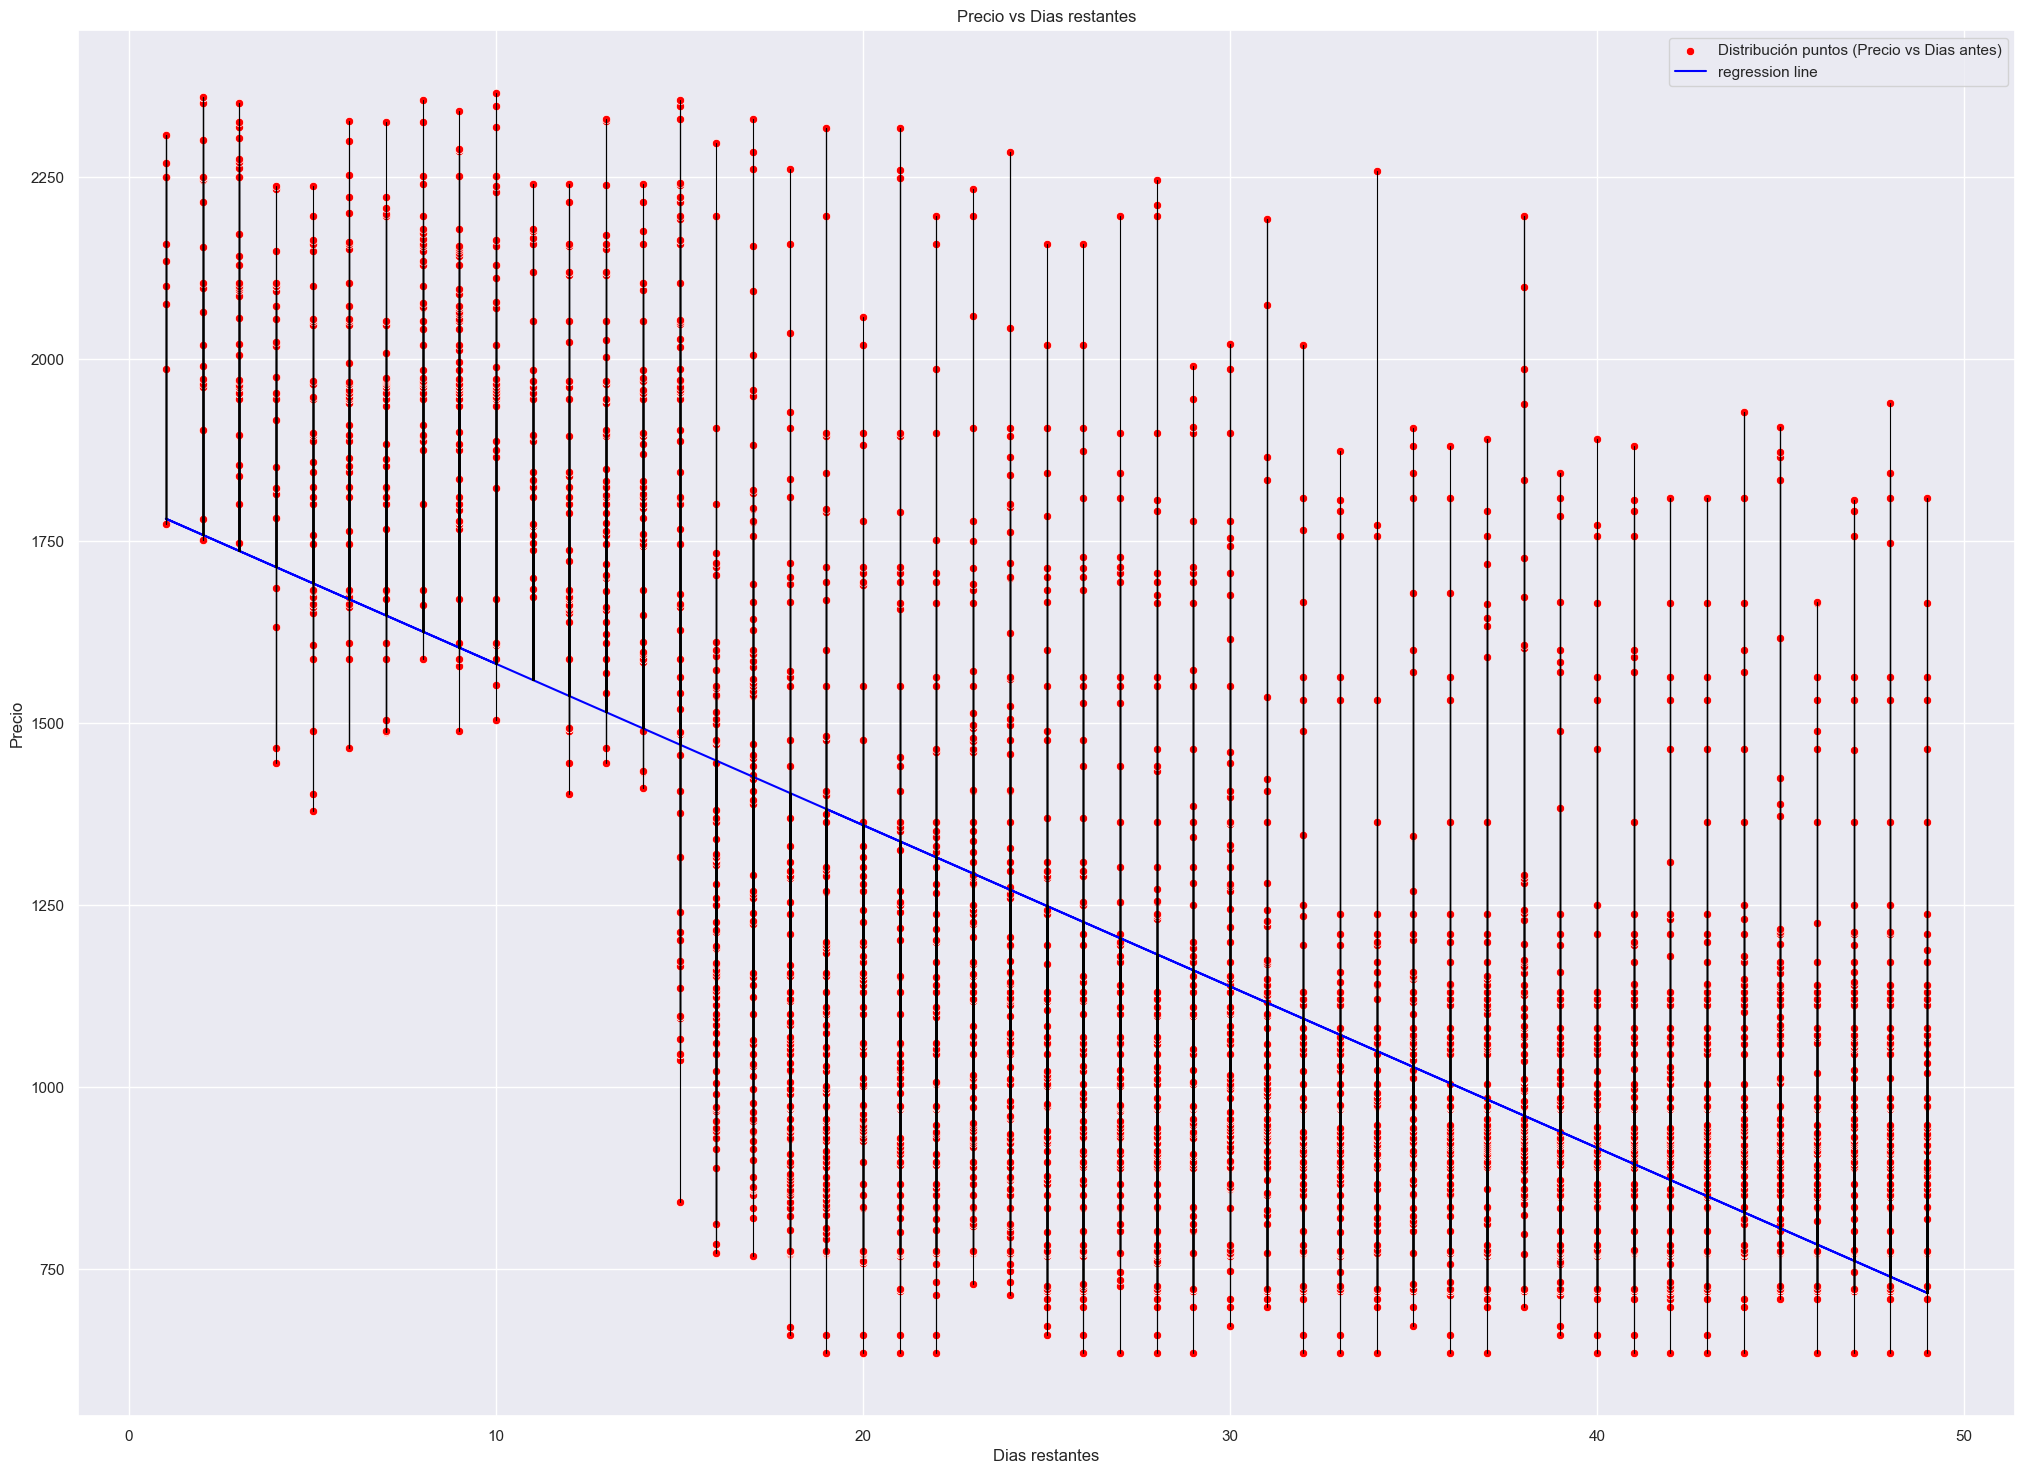

In [50]:
#Regresión lineal larga
# Crear el gráfico de dispersión con puntos de datos en rojo
plt.figure(figsize=(25, 18))
sns.scatterplot(x='days_left', y='dolares', data=df, color='red', label='Distribución puntos (Precio vs Dias antes)')

# Ajustar la línea de tendencia (regresión lineal)
slope, intercept = np.polyfit(df['days_left'], df['dolares'], 1)
plt.plot(df['days_left'], slope * df['days_left'] + intercept, color='blue', label='regression line')

# Dibujar líneas que conectan cada punto con la línea de tendencia
for index, row in df.iterrows():
    x = row['days_left']
    y_actual = row['dolares']
    y_estimado = slope * x + intercept
    plt.plot([x, x], [y_actual, y_estimado], color='black', linewidth=0.8)

# Etiquetas y título
plt.xlabel('Dias restantes')
plt.ylabel('Precio')
plt.title('Precio vs Dias restantes')
plt.legend()

# Mostrar el gráfico
plt.show()

In [51]:
# Extraer las columnas como matrices numpy
X = df['days_left'].values
y = df['dolares'].values

# Agregar una columna de unos para la constante (intercepción)
X_matrix = np.column_stack((np.ones(X.shape[0]), X))

print("matriz columna de unos")
print(X_matrix)

# Calcular los coeficientes utilizando la fórmula matricial (X^T * X)^(-1) * X^T * y
coefficients = np.linalg.inv(X_matrix.T @ X_matrix) @ X_matrix.T @ y

# Calcular las predicciones
predictions = X_matrix @ coefficients

# Calcular el error residual
residuals = y - predictions

# Grados de libertad
n = len(y)
p = X_matrix.shape[1] - 1
dof = n - p - 1

# Calcular el error estándar residual (residual standard error)
residual_std_error = np.sqrt(np.sum(residuals**2) / dof)

# Calcular el coeficiente de determinación R2
total_sum_squares = np.sum((y - np.mean(y))**2)
explained_sum_squares = np.sum((predictions - np.mean(y))**2)
r_squared = explained_sum_squares / total_sum_squares

# Calcular la estadística F
f_statistic = (explained_sum_squares / p) / (residuals.T @ residuals / dof)

# Crear una tabla con los resultados
results_table = pd.DataFrame({
    'Coeficiente': coefficients,
    'Error estándar': np.sqrt(np.diagonal(np.linalg.inv(X_matrix.T @ X_matrix)) * residual_std_error**2),
    'Estadístico t': coefficients / np.sqrt(np.diagonal(np.linalg.inv(X_matrix.T @ X_matrix)) * residual_std_error**2),
    'Valor p': 2 * (1 - stats.t.cdf(np.abs(coefficients / np.sqrt(np.diagonal(np.linalg.inv(X_matrix.T @ X_matrix)) * residual_std_error**2)), dof)),
}, index=['Intercepto', 'days_left'])

print("Resultados de la Regresión:")
print(results_table)
print("\nResidual Standard Error:", residual_std_error)
print("Coeficiente de determinación R2:", r_squared)
print("Estadística F:", f_statistic)

matriz columna de unos
[[ 1. 19.]
 [ 1. 20.]
 [ 1. 21.]
 ...
 [ 1.  2.]
 [ 1.  2.]
 [ 1. 10.]]
Resultados de la Regresión:
            Coeficiente  Error estándar  Estadístico t  Valor p
Intercepto  1803.058987       11.356645     158.766864      0.0
days_left    -22.146743        0.365045     -60.668574      0.0

Residual Standard Error: 334.95100097690664
Coeficiente de determinación R2: 0.4099809229417345
Estadística F: 3680.675817551425


Por cada incremento de la variable "days_left" (manteniendo las demás variables constantes), disminuye el precio en -22.15 dolares. 

# Método regresión lineal simple multiple Largo

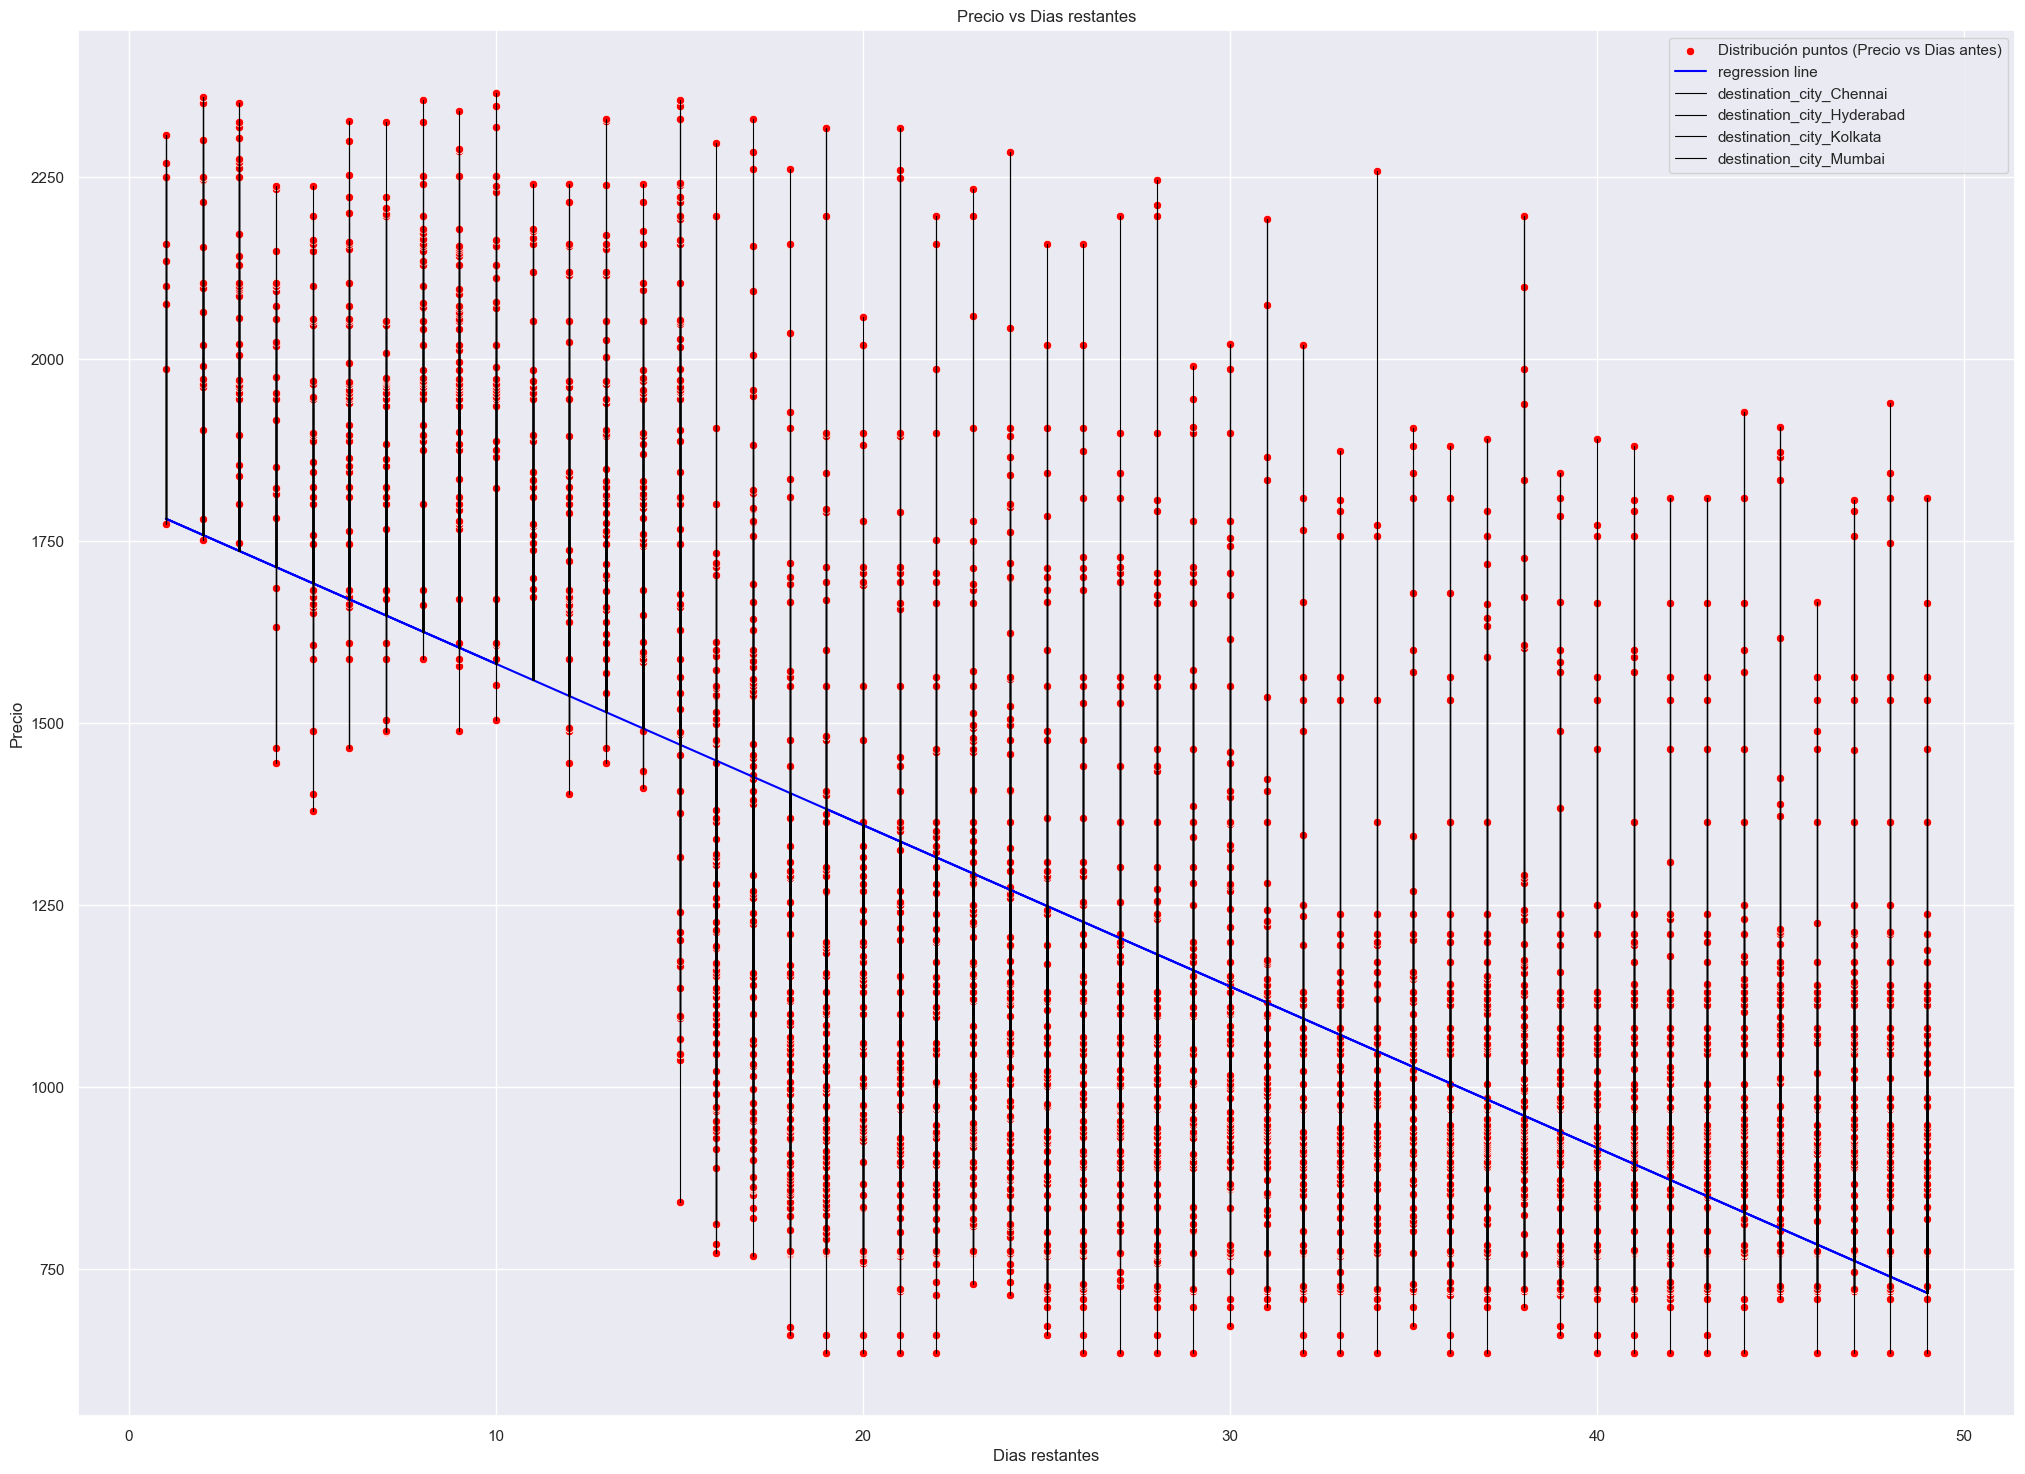

In [52]:
plt.figure(figsize=(25, 18))
sns.scatterplot(x='days_left', y='dolares', data=df, color='red', label='Distribución puntos (Precio vs Dias antes)')

# Ajustar la línea de tendencia (regresión lineal)
slope, intercept = np.polyfit(df['days_left'], df['dolares'], 1)
plt.plot(df['days_left'], slope * df['days_left'] + intercept, color='blue', label='regression line')

# Dibujar líneas que conectan cada punto con la línea de tendencia
for index, row in df.iterrows():
    x = row['days_left']
    y_actual = row['dolares']
    y_estimado = slope * x + intercept
    plt.plot([x, x], [y_actual, y_estimado], color='black', linewidth=0.8)

# Etiquetas y título
plt.xlabel('Dias restantes')
plt.ylabel('Precio')
plt.title('Precio vs Dias restantes')

# Agregar las variables destination_city a la leyenda
legend_labels = ['Distribución puntos (Precio vs Dias antes)', 'regression line']
for city in ['Chennai', 'Hyderabad', 'Kolkata', 'Mumbai']:
    legend_labels.append(f'destination_city_{city}')
    
plt.legend(legend_labels)

# Mostrar el gráfico
plt.show()

In [53]:
# Extraer las columnas como matrices numpy
X_days_left = df['days_left'].values
X_destination_chennai = df['destination_city_Chennai'].values
X_destination_hyderabad = df['destination_city_Hyderabad'].values
X_destination_kolkata = df['destination_city_Kolkata'].values
X_destination_mumbai = df['destination_city_Mumbai'].values

y = df['dolares'].values

# Agregar una columna de unos para la constante (intercepción)
X_matrix = np.column_stack((np.ones(X_days_left.shape[0]), X_days_left, 
                            X_destination_chennai, X_destination_hyderabad, 
                            X_destination_kolkata, X_destination_mumbai))

# Calcular los coeficientes utilizando la fórmula matricial (X^T * X)^(-1) * X^T * y
coefficients = np.linalg.inv(X_matrix.T @ X_matrix) @ X_matrix.T @ y

# Resto del código (calculación de predicciones, error residual, grados de libertad, etc.)

# Crear una tabla con los resultados
results_table = pd.DataFrame({
    'Coeficiente': coefficients,
    'Error estándar': np.sqrt(np.diagonal(np.linalg.inv(X_matrix.T @ X_matrix)) * residual_std_error**2),
    'Estadístico t': coefficients / np.sqrt(np.diagonal(np.linalg.inv(X_matrix.T @ X_matrix)) * residual_std_error**2),
    'Valor p': 2 * (1 - stats.t.cdf(np.abs(coefficients / np.sqrt(np.diagonal(np.linalg.inv(X_matrix.T @ X_matrix)) * residual_std_error**2)), dof)),
}, index=['Intercepto', 'days_left', 'destination_city_Chennai', 
          'destination_city_Hyderabad', 'destination_city_Kolkata', 
          'destination_city_Mumbai'])

print("Resultados de la Regresión:")
print(results_table)
print("\nResidual Standard Error:", residual_std_error)
print("Coeficiente de determinación R2:", r_squared)
print("Estadística F:", f_statistic)

Resultados de la Regresión:
                            Coeficiente  Error estándar  Estadístico t  \
Intercepto                  1629.325348       14.306558     113.886611   
days_left                    -20.353364        0.373807     -54.448860   
destination_city_Chennai     224.723745       12.361296      18.179626   
destination_city_Hyderabad   -16.537213       14.050990      -1.176943   
destination_city_Kolkata     221.041941       12.922830      17.104763   
destination_city_Mumbai      441.195913       47.333263       9.321054   

                             Valor p  
Intercepto                  0.000000  
days_left                   0.000000  
destination_city_Chennai    0.000000  
destination_city_Hyderabad  0.239271  
destination_city_Kolkata    0.000000  
destination_city_Mumbai     0.000000  

Residual Standard Error: 334.95100097690664
Coeficiente de determinación R2: 0.4099809229417345
Estadística F: 3680.675817551425


Cuando el destino es Chennai se espera que el precio aumente en 224.72 , cuando el destino es Hyderabad se espera que el precio disminuya en 16.53,cuando el destino es Kolkata se espera que el precio aumente en 221.04, cuando el destino es Mumbai se espera que el precio aumente en 441.19.

# Analisis de correlación 

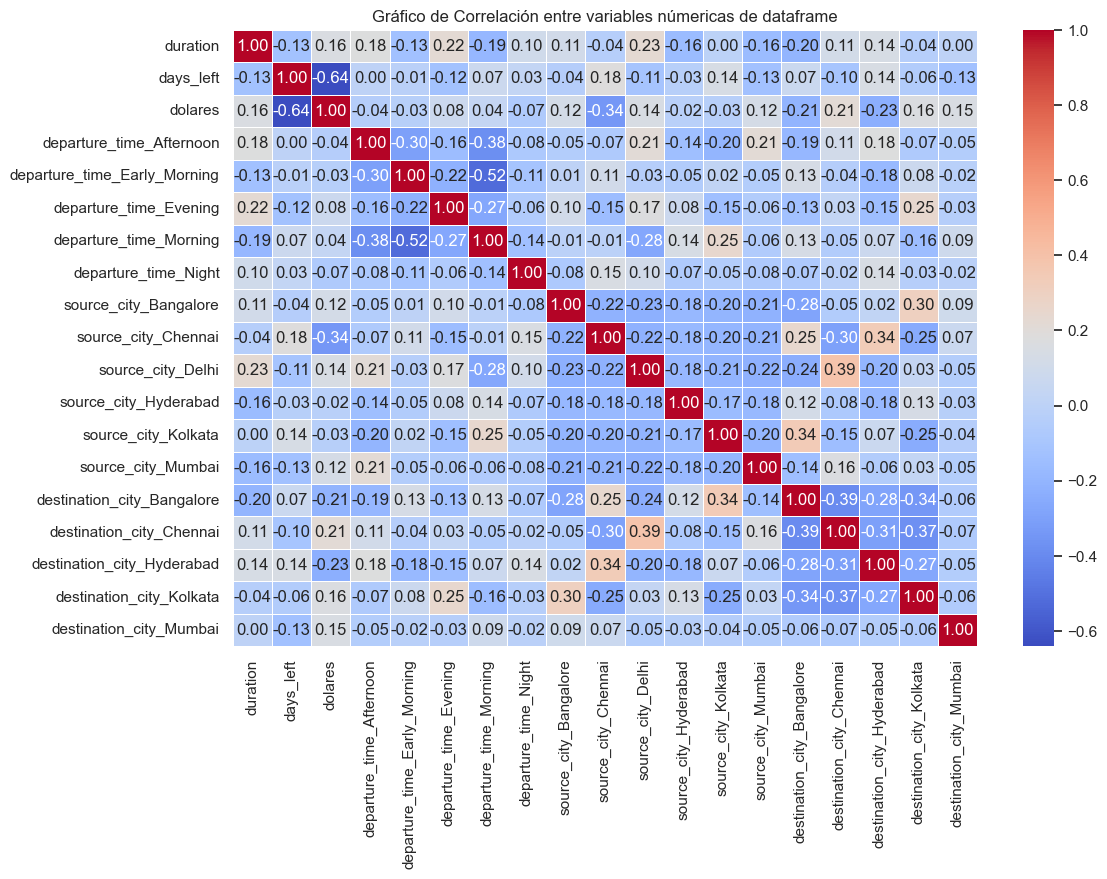

In [54]:
variables_numericas= ["departure_time","destination_city"]

matriz_correlacion=df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Gráfico de Correlación entre variables númericas de dataframe")
plt.show()

Se evidencia que las variabels de interes en este caso "days_left" tiene una correlación positiva con el destino de Hyderabad. A continaución se amplia la matriz con las variables de interes "days_left","destination_city_Hyderabad"

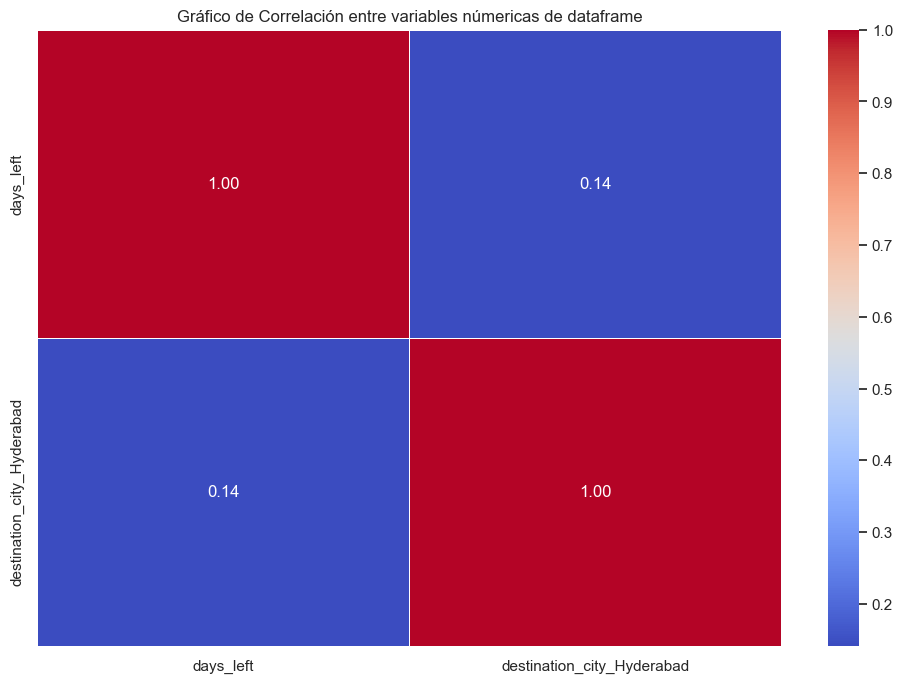

In [55]:
variables_numericas= ["days_left","destination_city_Hyderabad"]

matriz_correlacion=df[variables_numericas].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Gráfico de Correlación entre variables númericas de dataframe")
plt.show()

Por ello sabemos que existe un problema de multicolinealidad muy pequeño de tipo categorico.

# Problemas

## Problema 1 de multicolinealidad

Sabemos que los problemas de multicolinealidad surgen debido a una correlación positiva entre las vairbales x. En el caso que se muestra a continuación no debe existir problema de multiconialidad ya que la correlación es negativa de -0.13.

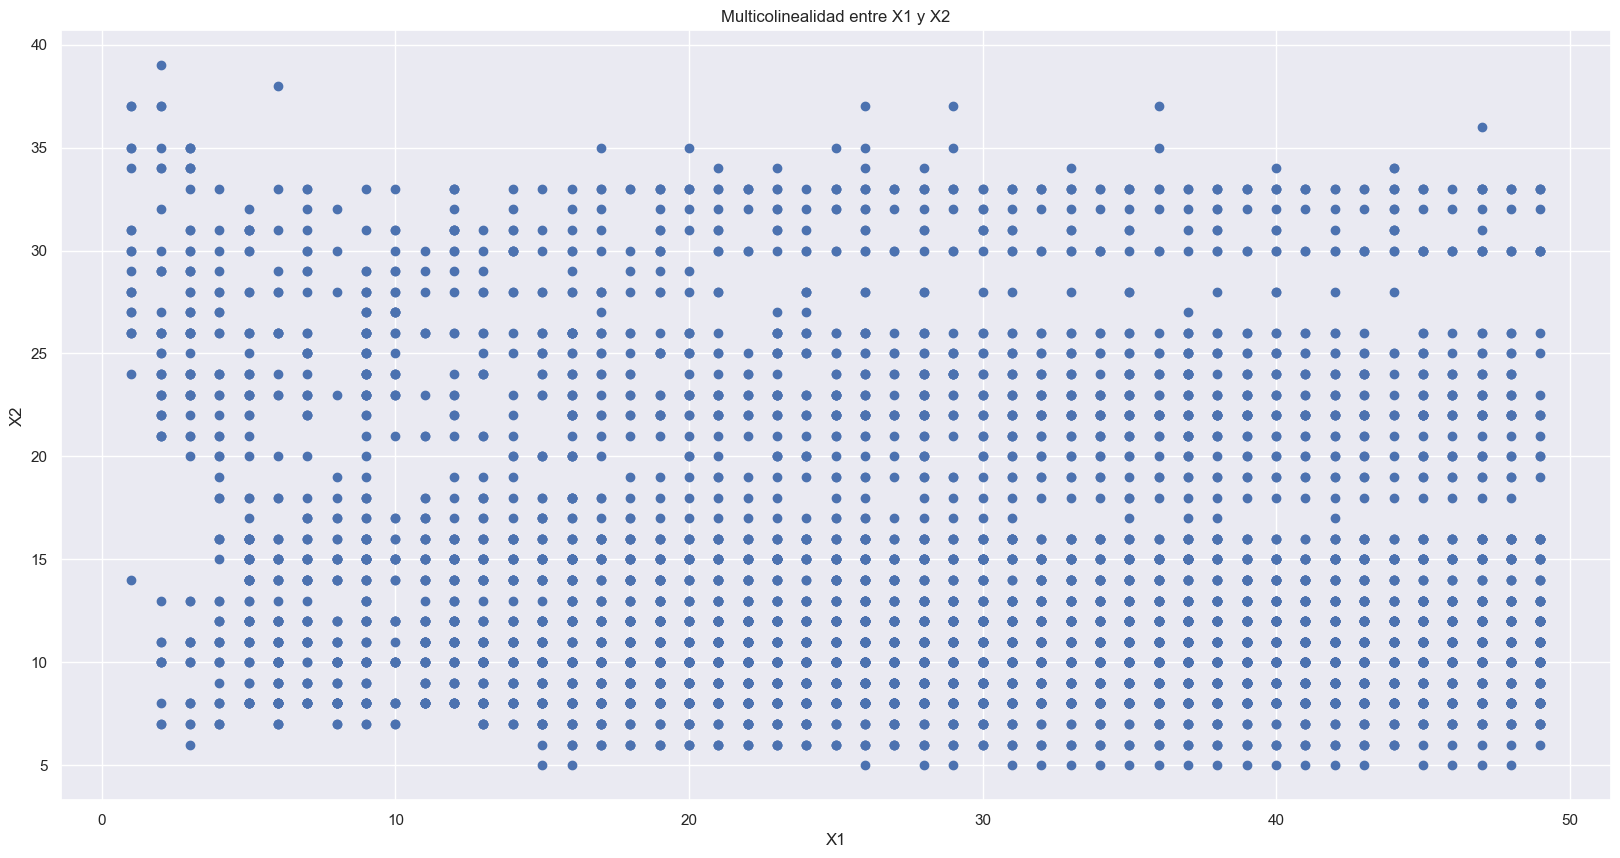

In [56]:
#Problema 1 de multicolinealidad
# Crear un DataFrame
data = pd.DataFrame({'X1': df['days_left'], 'X2': df['duration'], 'y': df['dolares']})

# Establecer el tamaño de la figura
plt.figure(figsize=(20, 10)) 

# Gráfica de correlación entre X1 y X2
plt.scatter(data['X1'], data['X2'])
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Multicolinealidad entre X1 y X2')
plt.show()

Se comprueba la hipotesis mencionada al inicio del problema

# No linealidad de los datos

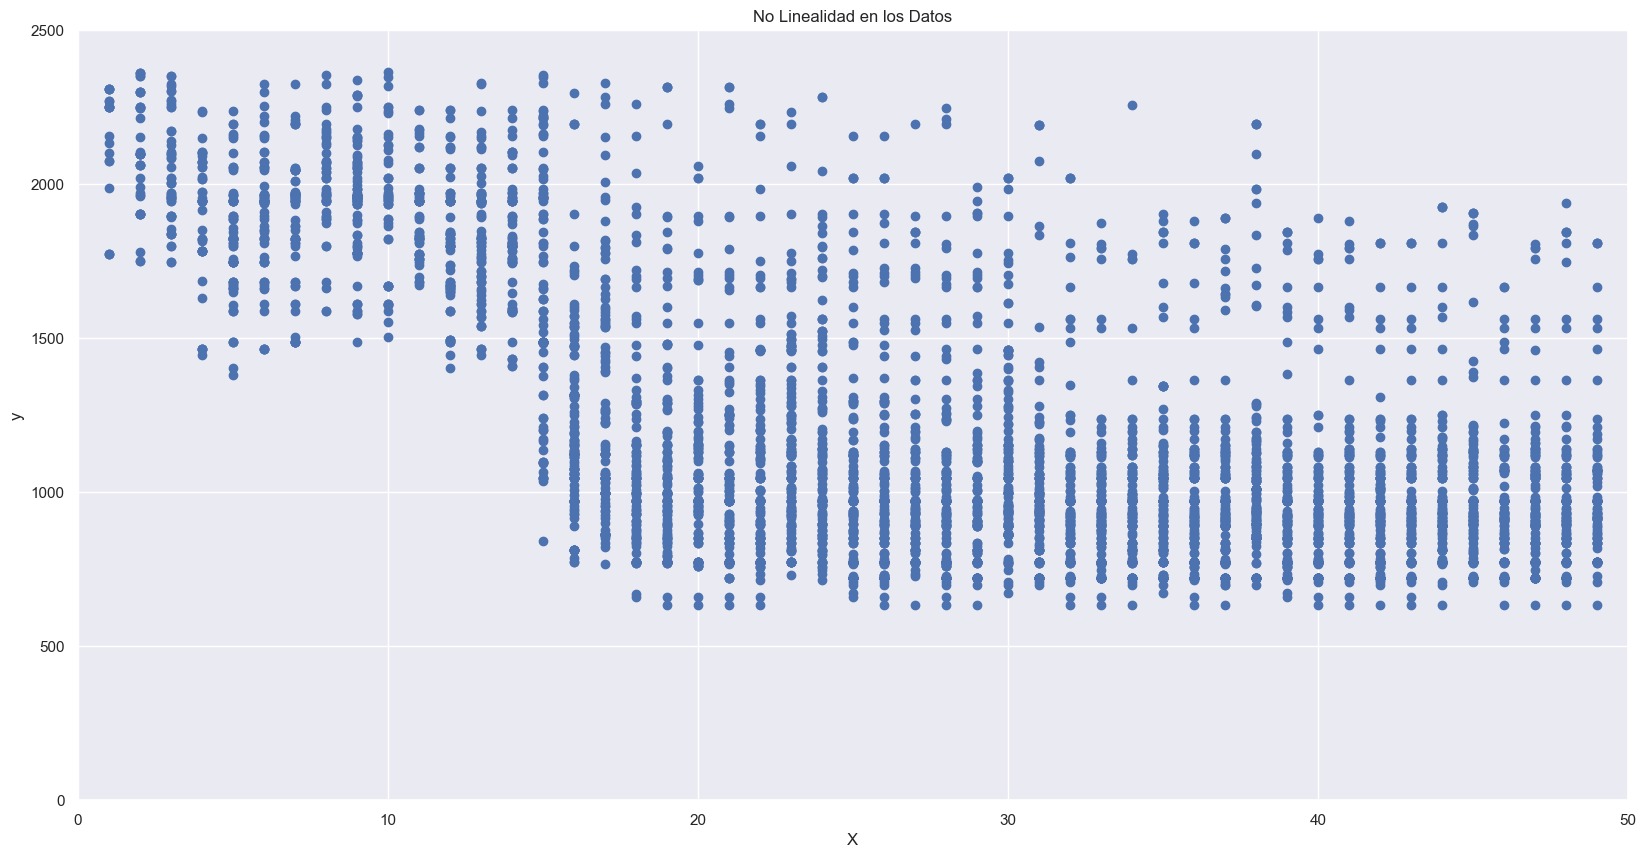

In [57]:
# Crear un DataFrame
data = pd.DataFrame({'X': df["days_left"], 'y': df["dolares"]})

# Establecer el tamaño de la figura
plt.figure(figsize=(20, 10)) 

# Gráfica de dispersión de y vs. X
plt.scatter(data['X'], data['y'])
plt.xlabel('X')
plt.ylabel('y')
plt.title('No Linealidad en los Datos')

# Ajustar los límites de los ejes x e y
plt.xlim([0, 50])  # Reemplaza xmin y xmax con los valores deseados
plt.ylim([0, 2500])  # Reemplaza ymin y ymax con los valores deseados


plt.show()

No existe ningun patron de errores por lo tnato se sabe que los datos son lineales

# Mejor modelo

Modelo 1

In [59]:
variables = ["destination_city_Chennai","destination_city_Hyderabad","destination_city_Kolkata","destination_city_Mumbai"]  # Variables a considerar

best_model = None
best_aic = float("inf")
best_bic = float("inf")
best_cp = float("inf")

for subset_size in range(1, len(variables) + 1):
    for subset in combinations(variables, subset_size):
        X = df[list(subset)]
        X = sm.add_constant(X)  # Añade una columna de constantes para el intercepto
        y = df["dolares"]  # Variable objetivo
        
        model = sm.OLS(y, X).fit()
        aic = model.aic
        bic = model.bic
        cp = model.mse_model / model.mse_resid
        
        if aic < best_aic:
            best_aic = aic
            best_model = model
        
        if bic < best_bic:
            best_bic = bic
        
        if cp < best_cp:
            best_cp = cp

print("Best AIC:", best_aic)
print("Best BIC:", best_bic)
print("Best CP:", best_cp)

Best AIC: 78592.7014690295
Best BIC: 78625.57783604196
Best CP: 121.2648129639668


Modelo 2

In [60]:
variables = ["days_left"]  # Variables a considerar

best_model = None
best_aic = float("inf")
best_bic = float("inf")
best_cp = float("inf")

for subset_size in range(1, len(variables) + 1):
    for subset in combinations(variables, subset_size):
        X = df[list(subset)]
        X = sm.add_constant(X)  # Añade una columna de constantes para el intercepto
        y = df["dolares"]  # Variable objetivo
        
        model = sm.OLS(y, X).fit()
        aic = model.aic
        bic = model.bic
        cp = model.mse_model / model.mse_resid
        
        if aic < best_aic:
            best_aic = aic
            best_model = model
        
        if bic < best_bic:
            best_bic = bic
        
        if cp < best_cp:
            best_cp = cp

print("Best AIC:", best_aic)
print("Best BIC:", best_bic)
print("Best CP:", best_cp)

Best AIC: 76656.51533596574
Best BIC: 76669.66588277073
Best CP: 3680.675817551427


Modelo 3

In [61]:
variables = ["days_left","destination_city_Chennai","destination_city_Hyderabad","destination_city_Kolkata","destination_city_Mumbai"]  # Variables a considerar

best_model = None
best_aic = float("inf")
best_bic = float("inf")
best_cp = float("inf")

for subset_size in range(1, len(variables) + 1):
    for subset in combinations(variables, subset_size):
        X = df[list(subset)]
        X = sm.add_constant(X)  # Añade una columna de constantes para el intercepto
        y = df["dolares"]  # Variable objetivo
        
        model = sm.OLS(y, X).fit()
        aic = model.aic
        bic = model.bic
        cp = model.mse_model / model.mse_resid
        
        if aic < best_aic:
            best_aic = aic
            best_model = model
        
        if bic < best_bic:
            best_bic = bic
        
        if cp < best_cp:
            best_cp = cp

print("Best AIC:", best_aic)
print("Best BIC:", best_bic)
print("Best CP:", best_cp)

Best AIC: 75985.20063337308
Best BIC: 76018.07700038554
Best CP: 121.2648129639668


El mejor modelo es el modelo 3  debido que tiene el valor más bajo tanto de AIC como de BIC, lo que sugiere que es el mejor modelo en términos de ajuste y simplicidad. Además, tiene un valor bajo de CP, lo que indica un buen equilibrio entre ajuste y generalización.

# Conclusiones

El modelo presentado solo aplica para personas que viajan en vuelos de clase economica que realizan dos paradas por que la data filtrada solo tomo estos variables.

La variable que define y tiene mas significancia en el mdoelo presentado es "days_left" por que en si misma tiene un R cuadrado de 41%. Entre mas grande sea el margen de tiempo previo de la compra del vuelo, más economico será el vuelo.

El modelo funciona de tal manera que el viajero pueda saber que destino ira y con cuantos días de anticipación debe comprar el vuelo.

Los destinos de interes son: "destination_city_Chennai","destination_city_Hyderabad","destination_city_Kolkata","destination_city_Mumbai", se retiro "destination_city_Bangalore" por que no tenia significancia en el R cuadrado comos e meustra en las pruebas de hipotesis .

Cuando el destino es Chennai o Kolkata, se espera que el valor de la variable de respuesta aumente, lo que podría indicar que los vuelos a estas ciudades son más costosos en comparación con otros destinos.

Según los metodos AIC, BIC y CP el mejor modelo es aquel que tiene como variables dependientes "days_left","destination_city_Chennai","destination_city_Hyderabad","destination_city_Kolkata","destination_city_Mumbai" y como variable dependiente "dolares".

Los datos atipicos pueden ser demasiados, en este caso los redujo de 127000 a 5000

# CASO 2

## Extensiones de la regresión

### Interacciones entre variables

Interacciones entre variables del modelo

In [108]:
# Crear la columna de interacción entre 'days_left' y 'destination_city's
df['days_left*destination_city_Mumbai*destination_city_Kolkata*destination_city_Hyderabad*destination_city_Chennai'] = df['days_left'] * df['destination_city_Mumbai']* df['destination_city_Kolkata']* df['destination_city_Hyderabad']* df['destination_city_Chennai']

# Definir las variables independientes (predictoras) y la variable dependiente (objetivo)
X = df[['days_left', 'destination_city_Mumbai', 'destination_city_Kolkata', 'destination_city_Hyderabad', 'destination_city_Chennai', 'days_left*destination_city_Mumbai*destination_city_Kolkata*destination_city_Hyderabad*destination_city_Chennai']]
y = df['dolares']

# Agregar una constante para el término independiente (b0)
X = sm.add_constant(X)

# Ajustar el modelo de regresión lineal con interacción
modelo = sm.OLS(y, X).fit()

# Obtener los resultados de la regresión
resultados = modelo.summary()

# Imprimir los resultados
print(resultados)

                            OLS Regression Results                            
Dep. Variable:                dolares   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     980.8
Date:                Mon, 04 Sep 2023   Prob (F-statistic):               0.00
Time:                        02:46:19   Log-Likelihood:                -37987.
No. Observations:                5299   AIC:                         7.599e+04
Df Residuals:                    5293   BIC:                         7.603e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                                                                                                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

La interacción entre days_left y destination_city tiene un R cuadrado de 48% lo que evidencia que estas interacciones aumentan en un 7% el R cuadrado del modelo de regresión lineal mostrado en el caso 2, por lo que se concluye que la interacción entre estas variables genera un aumento pero no es significativo del todo

### Efectos potenciales en regresión lineal multiple

#### Days_left

Esta es la regresión sin aplicarle efectos potenciales

In [66]:
df['days_left^1'] = df['days_left'] ** 1

# Definir las variables independientes (predictoras) y la variable dependiente (objetivo)
X = df[['days_left', 'days_left^1']]
y = df['dolares']

# Agregar una constante para el término independiente (b0)
X = sm.add_constant(X)

# Ajustar el modelo de regresión lineal
modelo = sm.OLS(y, X).fit()
b0, b1, b2 = modelo.params

# Obtener los resultados de la regresión
resultados = modelo.summary()

# Imprimir los resultados
print(resultados)

                            OLS Regression Results                            
Dep. Variable:                dolares   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     3681.
Date:                Mon, 04 Sep 2023   Prob (F-statistic):               0.00
Time:                        01:28:57   Log-Likelihood:                -38326.
No. Observations:                5299   AIC:                         7.666e+04
Df Residuals:                    5297   BIC:                         7.667e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1803.0590     11.357    158.767      

Como se ve el R cuadrado es el mismo que se ha venido trabajando durante el caso 1

Ahora se empezaran aplicar los efectos potenciales
Primero se aplicara el efecto: x^2

In [64]:
df['days_left^2'] = df['days_left'] ** 2

# Definir las variables independientes (predictoras) y la variable dependiente (objetivo)
X = df[['days_left', 'days_left^2']]
y = df['dolares']

# Agregar una constante para el término independiente (b0)
X = sm.add_constant(X)

# Ajustar el modelo de regresión lineal
modelo = sm.OLS(y, X).fit()
b0, b1, b2 = modelo.params

# Obtener los resultados de la regresión
resultados = modelo.summary()

# Imprimir los resultados
print(resultados)

                            OLS Regression Results                            
Dep. Variable:                dolares   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     3133.
Date:                Mon, 04 Sep 2023   Prob (F-statistic):               0.00
Time:                        01:27:11   Log-Likelihood:                -37656.
No. Observations:                5299   AIC:                         7.532e+04
Df Residuals:                    5296   BIC:                         7.534e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2357.3870     17.367    135.739      

Se puede ver una mejora en el R cuadrado pasando de 41% de significancia a un 54%

Segundo se aplicara el efecto: x^3

In [65]:
df['days_left^3'] = df['days_left'] ** 3

# Definir las variables independientes (predictoras) y la variable dependiente (objetivo)
X = df[['days_left', 'days_left^3']]
y = df['dolares']

# Agregar una constante para el término independiente (b0)
X = sm.add_constant(X)

# Ajustar el modelo de regresión lineal
modelo = sm.OLS(y, X).fit()
b0, b1, b2 = modelo.params

# Obtener los resultados de la regresión
resultados = modelo.summary()

# Imprimir los resultados
print(resultados)

                            OLS Regression Results                            
Dep. Variable:                dolares   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     3076.
Date:                Mon, 04 Sep 2023   Prob (F-statistic):               0.00
Time:                        01:28:23   Log-Likelihood:                -37682.
No. Observations:                5299   AIC:                         7.537e+04
Df Residuals:                    5296   BIC:                         7.539e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2228.0640     15.000    148.539      

Se evidencia una disminución de 1% aproximadamente con respecto a la regresión con variable days_left^2 

Tercero se aplicara el efecto: x^4

In [67]:
df['days_left^4'] = df['days_left'] ** 4

# Definir las variables independientes (predictoras) y la variable dependiente (objetivo)
X = df[['days_left', 'days_left^4']]
y = df['dolares']

# Agregar una constante para el término independiente (b0)
X = sm.add_constant(X)

# Ajustar el modelo de regresión lineal
modelo = sm.OLS(y, X).fit()
b0, b1, b2 = modelo.params

# Obtener los resultados de la regresión
resultados = modelo.summary()

# Imprimir los resultados
print(resultados)

                            OLS Regression Results                            
Dep. Variable:                dolares   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     2955.
Date:                Mon, 04 Sep 2023   Prob (F-statistic):               0.00
Time:                        01:29:36   Log-Likelihood:                -37738.
No. Observations:                5299   AIC:                         7.548e+04
Df Residuals:                    5296   BIC:                         7.550e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2147.5661     13.912    154.371      

Se evidencia una disminución de 1% aproximadamente con respecto a la regresión con variable days_left^3

Cuarto se hara una prueba con efecto: x^10

In [68]:
df['days_left^10'] = df['days_left'] ** 10

# Definir las variables independientes (predictoras) y la variable dependiente (objetivo)
X = df[['days_left', 'days_left^10']]
y = df['dolares']

# Agregar una constante para el término independiente (b0)
X = sm.add_constant(X)

# Ajustar el modelo de regresión lineal
modelo = sm.OLS(y, X).fit()
b0, b1, b2 = modelo.params

# Obtener los resultados de la regresión
resultados = modelo.summary()

# Imprimir los resultados
print(resultados)

                            OLS Regression Results                            
Dep. Variable:                dolares   R-squared:                       0.413
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     1866.
Date:                Mon, 04 Sep 2023   Prob (F-statistic):               0.00
Time:                        01:36:19   Log-Likelihood:                -38311.
No. Observations:                5299   AIC:                         7.663e+04
Df Residuals:                    5296   BIC:                         7.665e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1792.9389     11.473    156.279   

Se evidencia que los efectos con x^10 son de disminución con respecto a x^2, x^3 y x^4; sin embargo, se empieza acercar al R cuadrado de la regresión lineal usando la predictoria como dolares y la independiente como days_left

Por último se hara una prueba con efecto: x^100

In [69]:
df['days_left^100'] = df['days_left'] ** 100

# Definir las variables independientes (predictoras) y la variable dependiente (objetivo)
X = df[['days_left', 'days_left^100']]
y = df['dolares']

# Agregar una constante para el término independiente (b0)
X = sm.add_constant(X)

# Ajustar el modelo de regresión lineal
modelo = sm.OLS(y, X).fit()
b0, b1, b2 = modelo.params

# Obtener los resultados de la regresión
resultados = modelo.summary()

# Imprimir los resultados
print(resultados)

                            OLS Regression Results                            
Dep. Variable:                dolares   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     1842.
Date:                Mon, 04 Sep 2023   Prob (F-statistic):               0.00
Time:                        01:40:56   Log-Likelihood:                -38325.
No. Observations:                5299   AIC:                         7.666e+04
Df Residuals:                    5296   BIC:                         7.668e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1805.0577     11.428    157.951

En conclusión el uso de la variable days_left^2 es la mejor opción pues a medida que aumenta el exponente el R cuadrado vuelve tiende a reducirse hasta alcanzar mismo valor que muestra la regresión lineal usando la predictoria como dolares y la independiente como days_left (R cuadrado= 41%)

Asi quedaria el modelo de regresión linea usando la variable days_left^2

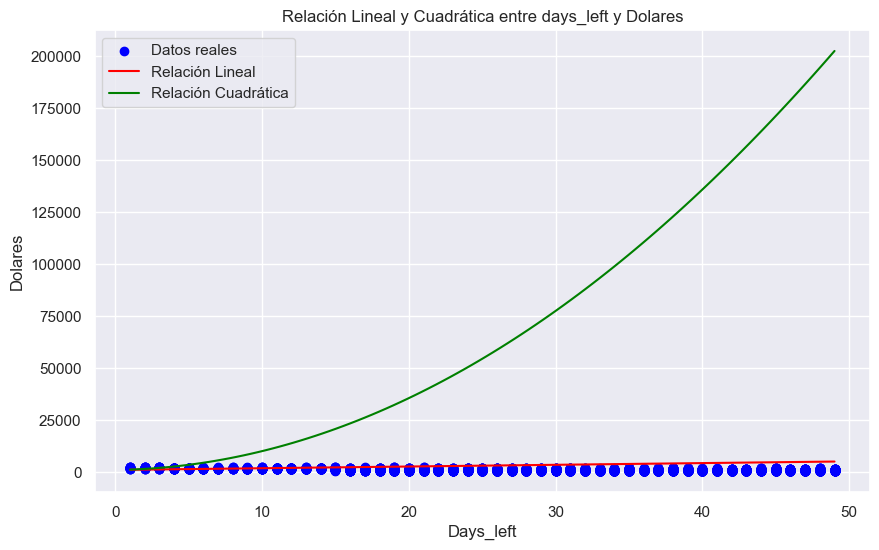

In [105]:
# Definir las variables independientes y dependientes
dolares = df['dolares']
days_left = df['days_left']
days_left_squared = df['days_left^2']

# Crear un rango de valores de "horsepower" para la gráfica
days_left_range = np.linspace(days_left.min(), days_left.max(), 100)

# Calcular las predicciones para las relaciones lineal y cuadrática
dolares_pred_linear = b0 + b1 * days_left_range
dolares_pred_quadratic = b0 + b1 * days_left_range + b2 * days_left_range**2

# Crear la figura y los ejes
plt.figure(figsize=(10, 6))
plt.scatter(days_left, dolares, label='Datos reales', color='blue')
plt.plot(days_left_range, dolares_pred_linear, label='Relación Lineal', color='red')
plt.plot(days_left_range, dolares_pred_quadratic, label='Relación Cuadrática', color='green')

# Etiquetas y título
plt.xlabel('Days_left')
plt.ylabel('Dolares')
plt.title('Relación Lineal y Cuadrática entre days_left y Dolares')

# Leyenda
plt.legend()

# Mostrar la gráfica
plt.show()

#### Destination_city_Chennai

Ahora se hara la prueba de solo X^2 para todas las variables destination_city

In [80]:
df['destination_city_Chennai^2'] = df["destination_city_Chennai"] ** 2

# Definir las variables independientes (predictoras) y la variable dependiente (objetivo)
X = df[['destination_city_Chennai', 'destination_city_Chennai^2']]
y = df['dolares']

# Agregar una constante para el término independiente (b0)
X = sm.add_constant(X)

# Ajustar el modelo de regresión lineal
modelo = sm.OLS(y, X).fit()
b0, b1, b2 = modelo.params

# Obtener los resultados de la regresión
resultados = modelo.summary()

# Imprimir los resultados
print(resultados)

                            OLS Regression Results                            
Dep. Variable:                dolares   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     251.6
Date:                Mon, 04 Sep 2023   Prob (F-statistic):           2.18e-55
Time:                        01:59:58   Log-Likelihood:                -39601.
No. Observations:                5299   AIC:                         7.921e+04
Df Residuals:                    5297   BIC:                         7.922e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [100]:
df['destination_city_Chennai^1'] = df["destination_city_Chennai"] ** 1

# Definir las variables independientes (predictoras) y la variable dependiente (objetivo)
X = df[['destination_city_Chennai', 'destination_city_Chennai^1']]
y = df['dolares']

# Agregar una constante para el término independiente (b0)
X = sm.add_constant(X)

# Ajustar el modelo de regresión lineal
modelo = sm.OLS(y, X).fit()
b0, b1, b2 = modelo.params

# Obtener los resultados de la regresión
resultados = modelo.summary()

# Imprimir los resultados
print(resultados)

                            OLS Regression Results                            
Dep. Variable:                dolares   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     251.6
Date:                Mon, 04 Sep 2023   Prob (F-statistic):           2.18e-55
Time:                        02:25:41   Log-Likelihood:                -39601.
No. Observations:                5299   AIC:                         7.921e+04
Df Residuals:                    5297   BIC:                         7.922e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

#### Destination_city_Hyderabad

In [86]:
df['destination_city_Hyderabad^2'] = df["destination_city_Hyderabad"] ** 2


# Definir las variables independientes (predictoras) y la variable dependiente (objetivo)
X = df[['destination_city_Hyderabad', 'destination_city_Hyderabad^2']]
y = df['dolares']

# Agregar una constante para el término independiente (b0)
X = sm.add_constant(X)

# Ajustar el modelo de regresión lineal
modelo = sm.OLS(y, X).fit()
b0, b1, b2 = modelo.params

# Obtener los resultados de la regresión
resultados = modelo.summary()

# Imprimir los resultados
print(resultados)

                            OLS Regression Results                            
Dep. Variable:                dolares   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     306.4
Date:                Mon, 04 Sep 2023   Prob (F-statistic):           9.63e-67
Time:                        02:02:42   Log-Likelihood:                -39575.
No. Observations:                5299   AIC:                         7.915e+04
Df Residuals:                    5297   BIC:                         7.917e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [99]:
df['destination_city_Hyderabad^1'] = df["destination_city_Hyderabad"] ** 1


# Definir las variables independientes (predictoras) y la variable dependiente (objetivo)
X = df[['destination_city_Hyderabad', 'destination_city_Hyderabad^1']]
y = df['dolares']

# Agregar una constante para el término independiente (b0)
X = sm.add_constant(X)

# Ajustar el modelo de regresión lineal
modelo = sm.OLS(y, X).fit()
b0, b1, b2 = modelo.params

# Obtener los resultados de la regresión
resultados = modelo.summary()

# Imprimir los resultados
print(resultados)

                            OLS Regression Results                            
Dep. Variable:                dolares   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     306.4
Date:                Mon, 04 Sep 2023   Prob (F-statistic):           9.63e-67
Time:                        02:25:21   Log-Likelihood:                -39575.
No. Observations:                5299   AIC:                         7.915e+04
Df Residuals:                    5297   BIC:                         7.917e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

#### Destination_city_Mumbai

In [94]:
df['destination_city_Mumbai^2'] = df["destination_city_Mumbai"] ** 2


# Definir las variables independientes (predictoras) y la variable dependiente (objetivo)
X = df[['destination_city_Mumbai', 'destination_city_Mumbai^2']]
y = df['dolares']

# Agregar una constante para el término independiente (b0)
X = sm.add_constant(X)

# Ajustar el modelo de regresión lineal
modelo = sm.OLS(y, X).fit()
b0, b1, b2 = modelo.params

# Obtener los resultados de la regresión
resultados = modelo.summary()

# Imprimir los resultados
print(resultados)

                            OLS Regression Results                            
Dep. Variable:                dolares   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     121.3
Date:                Mon, 04 Sep 2023   Prob (F-statistic):           6.70e-28
Time:                        02:11:17   Log-Likelihood:                -39664.
No. Observations:                5299   AIC:                         7.933e+04
Df Residuals:                    5297   BIC:                         7.935e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [101]:
df['destination_city_Mumbai^1'] = df["destination_city_Mumbai"] ** 1


# Definir las variables independientes (predictoras) y la variable dependiente (objetivo)
X = df[['destination_city_Mumbai', 'destination_city_Mumbai^1']]
y = df['dolares']

# Agregar una constante para el término independiente (b0)
X = sm.add_constant(X)

# Ajustar el modelo de regresión lineal
modelo = sm.OLS(y, X).fit()
b0, b1, b2 = modelo.params

# Obtener los resultados de la regresión
resultados = modelo.summary()

# Imprimir los resultados
print(resultados)

                            OLS Regression Results                            
Dep. Variable:                dolares   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     121.3
Date:                Mon, 04 Sep 2023   Prob (F-statistic):           6.70e-28
Time:                        02:26:35   Log-Likelihood:                -39664.
No. Observations:                5299   AIC:                         7.933e+04
Df Residuals:                    5297   BIC:                         7.935e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

#### Destination_city_Kolkata

In [97]:
df['destination_city_Kolkata^2'] = df["destination_city_Kolkata"] ** 2


# Definir las variables independientes (predictoras) y la variable dependiente (objetivo)
X = df[['destination_city_Kolkata', 'destination_city_Kolkata^2']]
y = df['dolares']

# Agregar una constante para el término independiente (b0)
X = sm.add_constant(X)

# Ajustar el modelo de regresión lineal
modelo = sm.OLS(y, X).fit()
b0, b1, b2 = modelo.params

# Obtener los resultados de la regresión
resultados = modelo.summary()

# Imprimir los resultados
print(resultados)

                            OLS Regression Results                            
Dep. Variable:                dolares   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     143.6
Date:                Mon, 04 Sep 2023   Prob (F-statistic):           1.17e-32
Time:                        02:19:13   Log-Likelihood:                -39653.
No. Observations:                5299   AIC:                         7.931e+04
Df Residuals:                    5297   BIC:                         7.932e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [102]:
df['destination_city_Kolkata^1'] = df["destination_city_Kolkata"] ** 1


# Definir las variables independientes (predictoras) y la variable dependiente (objetivo)
X = df[['destination_city_Kolkata', 'destination_city_Kolkata^1']]
y = df['dolares']

# Agregar una constante para el término independiente (b0)
X = sm.add_constant(X)

# Ajustar el modelo de regresión lineal
modelo = sm.OLS(y, X).fit()
b0, b1, b2 = modelo.params

# Obtener los resultados de la regresión
resultados = modelo.summary()

# Imprimir los resultados
print(resultados)

                            OLS Regression Results                            
Dep. Variable:                dolares   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     143.6
Date:                Mon, 04 Sep 2023   Prob (F-statistic):           1.17e-32
Time:                        02:27:04   Log-Likelihood:                -39653.
No. Observations:                5299   AIC:                         7.931e+04
Df Residuals:                    5297   BIC:                         7.932e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

En conclusión al ninguna de las variables destination_city^2 presentar cambios significativos en su R cuadrado, se decide solo usar los efectos cuadraticos de la variable days_left y omitir las otras variables

#### Mejor Modelo según efectos cuadraticos

In [110]:
X = df[["days_left","days_left^2","destination_city_Chennai","destination_city_Hyderabad","destination_city_Kolkata","destination_city_Mumbai"]]  # Variables independientes
y = df['dolares']  # .Variable dependiente

# Divide tus datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Añade una constante al conjunto de características (intercepto)
X_train = sm.add_constant(X_train)

# Crea y ajusta el modelo de regresión lineal utilizando statsmodels
model = sm.OLS(y_train, X_train).fit()

# Realiza predicciones utilizando el conjunto de prueba
X_test = sm.add_constant(X_test)  # Asegúrate de hacer lo mismo con los datos de prueba
y_pred = model.predict(X_test)

# Evalúa el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE:", mse)
print("R-squared:", r2)

# Imprime un resumen del modelo que incluye los p-values
print(model.summary())

MSE: 73390.69957824713
R-squared: 0.6019415721738965
                            OLS Regression Results                            
Dep. Variable:                dolares   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     1020.
Date:                Mon, 04 Sep 2023   Prob (F-statistic):               0.00
Time:                        02:56:02   Log-Likelihood:                -29897.
No. Observations:                4239   AIC:                         5.981e+04
Df Residuals:                    4232   BIC:                         5.985e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------